## Transformations , Modelling , Diaganostics

####  Importing Packages Used 
	
*   Package : SKLearn : Models
    *   Linear Regression (OLS as well)
    *	Lasso
    *	Ridge
*   Package : StatsModels : Models and tests
    *   OLS
    *   VIF
*   Package : SKLearn Preprocessing , Model Selection and Decomposition=
    *	K-Fold Validations
    *	Train Test Split
    *   PCA
    
*	Pandas Profiling
    *   Profiling for EDA


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import norm
import pandas_profiling

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
from scipy import stats



In [14]:
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Loading historical transactions and new transactions files , which have been profiled and cleaned up

In [15]:
#loading csv
hist_transactions = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/hist_trans_transformed.csv',parse_dates=['purchase_date'])
hist_transactions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.703331 2017-06-25 15:33:07    1.000000        16            37  
1        -0.733128 2017-07-15 12:10:45    1.000000        16            16  
2        -0.720386 2017-08-09 22:04:29    1.000000        16            37  
3        -0.735352 2017-09-02 10:06:26    1.000000        16            34  
4        -0.722865 2017-03-10 01:14:19    1.000000        16            37

In [16]:
hist_transactions.shape

(29112361, 14)

In [17]:
#loading csv
new_merchant_transactions = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/new_trans_transformed.csv',parse_dates=['purchase_date'])
new_merchant_transactions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.557574 2018-03-11 14:57:36    1.000000         9            19  
1        -0.569580 2018-03-19 18:53:37    1.000000         9            19  
2        -0.551037 2018-04-26 14:08:44    1.000000         9            14  
3        -0.671926 2018-03-07 09:43:21    1.000000        -1             8  
4        -0.659904 2018-03-22 21:07:53    1.000000        -1            29

In [18]:
new_merchant_transactions.shape

(1963031, 14)

#### Loading cleaned up merchants file

In [19]:
#loading csv
merchants = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/merchants_transformed.csv')
merchants.head() 

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_2  category_1  most_recent_sales_range  \
0    -0.057471           0                        1   
1    -0.057471           0                        1   
2    -0.057471           0                        1   
3    -0.057471           1                        1   
4    -0.057471           1                        1   

   most_recent_purchases_range  avg_sales_lag3  avg_purchases_lag3  \
0                            1       -0.400000            9.666667   
1                            1       -0.720000            1.750000   
2                            1      -82.130000          260.000000   
3                            1        1.000000            1.666667   
4                            1        1.000000            0.500000   

   active_months_lag3  avg_sales_lag6  active_months_lag6  \
0                   3       -2.250000                   6   
1                   3       -0.740000                   6   
2                   2      -82.130000                   2   
3                   3        1.010000                   6   
4                   3        1.010000                   6   

   avg_purchases_lag12  active_months_lag12  category_4  city_id  state_id  \
0            13.916667                   12           0      242         9   
1             1.687500                   12           0       22        16   
2           260.000000                    2           0       -1         5   
3             3.833333                   12           1       -1        -1   
4             0.347222                   12           1       -1        -1   

   category_2  
0    1.000000  
1    1.000000  
2    5.000000  
3    1.000000  
4    1.000000

In [20]:
merchants.shape

(334634, 19)

#### Operations on new and historical transactions files 
* Converting Categorical variables to numeric values
* Extracting purchase month from Purchase Date
* Merging old and new transaction files
* Merging the transactions files with merchant file using merchant_id

In [21]:
def convertToBinary(df):
    for col in ['authorized_flag', 'category_1']:
        df[col] = df[col].map({'Y':1, 'N':0})
    return df

hist_transactions = convertToBinary(hist_transactions)
new_merchant_transactions = convertToBinary(new_merchant_transactions)

In [22]:
print(hist_transactions['authorized_flag'].value_counts(dropna=False))
print(new_merchant_transactions['authorized_flag'].value_counts(dropna=False))

1    26595452
0     2516909
Name: authorized_flag, dtype: int64
1    1963031
Name: authorized_flag, dtype: int64


In [23]:
hist_transactions['purchase_month'] = hist_transactions['purchase_date'].dt.month
new_merchant_transactions['purchase_month'] = new_merchant_transactions['purchase_date'].dt.month

In [24]:
result_df = pd.DataFrame(hist_transactions.append(new_merchant_transactions))

In [25]:
result_df.shape

(31075392, 15)

In [26]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31075392 entries, 0 to 1963030
Data columns (total 15 columns):
authorized_flag         int64
card_id                 object
city_id                 int64
category_1              int64
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
purchase_month          int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(3)
memory usage: 3.7+ GB


In [27]:
all_transactions = pd.merge(result_df, merchants, on='merchant_id', how='left')

#### Final Dataset with all transactions and merchants info for that card.
* We now check for any correlations between the merged fields 


In [28]:
all_transactions.shape

(31075399, 33)

In [29]:
all_transactions.corr()

authorized_flag  city_id_x  category_1_x  \
authorized_flag                     1.000000   0.050498     -0.162808   
city_id_x                           0.050498   1.000000     -0.341933   
category_1_x                       -0.162808  -0.341933      1.000000   
installments                       -0.046540  -0.043185      0.125384   
merchant_category_id_x             -0.045794  -0.104977      0.234816   
month_lag                           0.038121  -0.021982      0.016950   
purchase_amount                    -0.001814  -0.000045     -0.000103   
category_2_x                        0.036181   0.160613     -0.197569   
state_id_x                          0.077482   0.197390     -0.497331   
subsector_id_x                      0.069582   0.054162     -0.184643   
purchase_month                     -0.010404  -0.011359      0.018567   
merchant_group_id                  -0.014454  -0.000041      0.024295   
merchant_category_id_y             -0.038561  -0.053976      0.179243   
subsector_id_y                      0.080118   0.130712     -0.274450   
numerical_2                         0.008484  -0.045862     -0.065492   
category_1_y                       -0.127671  -0.320209      0.686968   
most_recent_sales_range            -0.037766  -0.124449      0.259544   
most_recent_purchases_range        -0.022449  -0.106217      0.225365   
avg_sales_lag3                     -0.000296  -0.007069     -0.003354   
avg_purchases_lag3                 -0.000538  -0.007941     -0.001842   
active_months_lag3                  0.001695  -0.004396      0.001022   
avg_sales_lag6                     -0.000281  -0.006635     -0.003382   
active_months_lag6                  0.002534  -0.003746      0.000845   
avg_purchases_lag12                -0.001297  -0.013713      0.004173   
active_months_lag12                 0.000696   0.113401      0.013344   
category_4                         -0.035906  -0.390502      0.267762   
city_id_y                           0.055820   0.586785     -0.247407   
state_id_y                          0.078259   0.234161     -0.438644   
category_2_y                        0.037140   0.176100     -0.196096   

                             installments  merchant_category_id_x  month_lag  \
authorized_flag                 -0.046540               -0.045794   0.038121   
city_id_x                       -0.043185               -0.104977  -0.021982   
category_1_x                     0.125384                0.234816   0.016950   
installments                     1.000000                0.026267   0.004254   
merchant_category_id_x           0.026267                1.000000   0.016552   
month_lag                        0.004254                0.016552   1.000000   
purchase_amount                 -0.000013                0.000087  -0.000009   
category_2_x                    -0.023171               -0.086348  -0.013302   
state_id_x                      -0.064601               -0.133824  -0.027973   
subsector_id_x                  -0.056973               -0.010427  -0.009863   
purchase_month                   0.008311                0.024271   0.138167   
merchant_group_id               -0.007401               -0.059687  -0.003926   
merchant_category_id_y           0.015503                0.848675   0.000151   
subsector_id_y                  -0.073764               -0.171265  -0.035071   
numerical_2                     -0.019166               -0.139623  -0.018876   
category_1_y                     0.096332                0.341442   0.051618   
most_recent_sales_range          0.028186                0.078484  -0.012789   
most_recent_purchases_range     -0.002963                0.060854  -0.019665   
avg_sales_lag3                   0.000120                0.001767  -0.008367   
avg_purchases_lag3               0.000754                0.003048  -0.008326   
active_months_lag3              -0.000876               -0.001010   0.005901   
avg_sales_lag6                   0.000122                0.001742  -0.008285  

#### Dropping these columns as they are highly correlated , Correlation > +-0.8

In [30]:
#dropping due to high correlation 
all_transactions.drop(['merchant_category_id_y','subsector_id_y','state_id_y','category_2_y'], axis=1,inplace=True)
all_transactions.head()

authorized_flag          card_id  city_id_x  category_1_x  installments  \
0                1  C_ID_4e6213e9bc         88             0             0   
1                1  C_ID_4e6213e9bc         88             0             0   
2                1  C_ID_4e6213e9bc         88             0             0   
3                1  C_ID_4e6213e9bc         88             0             0   
4                1  C_ID_4e6213e9bc         88             0             0   

  category_3  merchant_category_id_x      merchant_id  month_lag  \
0          A                      80  M_ID_e020e9b302         -8   
1          A                     367  M_ID_86ec983688         -7   
2          A                      80  M_ID_979ed661fc         -6   
3          A                     560  M_ID_e6d5ae8ea6         -5   
4          A                      80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2_x  state_id_x  \
0        -0.703331 2017-06-25 15:33:07      1.000000          16   
1        -0.733128 2017-07-15 12:10:45      1.000000          16   
2        -0.720386 2017-08-09 22:04:29      1.000000          16   
3        -0.735352 2017-09-02 10:06:26      1.000000          16   
4        -0.722865 2017-03-10 01:14:19      1.000000          16   

   subsector_id_x  purchase_month  merchant_group_id  numerical_2  \
0              37               6          35.000000    23.014512   
1              16               7        2084.000000    -0.057471   
2              37               8       27369.000000     0.021849   
3              34               9       24104.000000    -0.057471   
4              37               3          35.000000    23.014512   

   category_1_y  most_recent_sales_range  most_recent_purchases_range  \
0      0.000000                 5.000000                     5.000000   
1      0.000000                 5.000000                     5.000000   
2      0.000000                 3.000000                     3.000000   
3      0.000000                 2.000000                     3.000000   
4      0.000000                 5.000000                     5.000000   

   avg_sales_lag3  avg_purchases_lag3  active_months_lag3  avg_sales_lag6  \
0        1.080000            1.082451            3.000000        1.140000   
1        1.060000            1.052071            3.000000        1.060000   
2        0.980000            0.974653            3.000000        0.980000   
3        1.000000            1.053443            3.000000        0.880000   
4        1.080000            1.082451            3.000000        1.140000   

   active_months_lag6  avg_purchases_lag12  active_months_lag12  category_4  \
0            6.000000             1.156844            12.000000    1.000000   
1            6.000000             1.062087            12.000000    1.000000   
2            6.000000             0.956668            12.000000    1.000000   
3            6.000000             0.864394            12.000000    1.000000   
4            6.000000             1.156844            12.000000    1.000000   

   city_id_y  
0  88.000000  
1  88.000000  
2  88.000000  
3  88.000000  
4  88.000000

#### Using one hot encoding for categorical variables with multiple categories as below 

In [31]:
#Converting categorical variables , using one hot encoding
all_transactions = pd.get_dummies(all_transactions, columns=['category_2_x', 'category_3','most_recent_sales_range','most_recent_purchases_range','category_4'])

In [32]:
all_transactions.head()

authorized_flag          card_id  city_id_x  category_1_x  installments  \
0                1  C_ID_4e6213e9bc         88             0             0   
1                1  C_ID_4e6213e9bc         88             0             0   
2                1  C_ID_4e6213e9bc         88             0             0   
3                1  C_ID_4e6213e9bc         88             0             0   
4                1  C_ID_4e6213e9bc         88             0             0   

   merchant_category_id_x      merchant_id  month_lag  purchase_amount  \
0                      80  M_ID_e020e9b302         -8        -0.703331   
1                     367  M_ID_86ec983688         -7        -0.733128   
2                      80  M_ID_979ed661fc         -6        -0.720386   
3                     560  M_ID_e6d5ae8ea6         -5        -0.735352   
4                      80  M_ID_e020e9b302        -11        -0.722865   

        purchase_date  state_id_x  subsector_id_x  purchase_month  \
0 2017-06-25 15:33:07          16              37               6   
1 2017-07-15 12:10:45          16              16               7   
2 2017-08-09 22:04:29          16              37               8   
3 2017-09-02 10:06:26          16              34               9   
4 2017-03-10 01:14:19          16              37               3   

   merchant_group_id  numerical_2  category_1_y  avg_sales_lag3  \
0          35.000000    23.014512      0.000000        1.080000   
1        2084.000000    -0.057471      0.000000        1.060000   
2       27369.000000     0.021849      0.000000        0.980000   
3       24104.000000    -0.057471      0.000000        1.000000   
4          35.000000    23.014512      0.000000        1.080000   

   avg_purchases_lag3  active_months_lag3  avg_sales_lag6  active_months_lag6  \
0            1.082451            3.000000        1.140000            6.000000   
1            1.052071            3.000000        1.060000            6.000000   
2            0.974653            3.000000        0.980000            6.000000   
3            1.053443            3.000000        0.880000            6.000000   
4            1.082451            3.000000        1.140000            6.000000   

   avg_purchases_lag12  active_months_lag12  city_id_y  category_2_x_1.0  \
0             1.156844            12.000000  88.000000                 1   
1             1.062087            12.000000  88.000000                 1   
2             0.956668            12.000000  88.000000                 1   
3             0.864394            12.000000  88.000000                 1   
4             1.156844            12.000000  88.000000                 1   

   category_2_x_2.0  category_2_x_3.0  category_2_x_4.0  category_2_x_5.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   category_3_A  category_3_B  category_3_C  most_recent_sales_range_1.0  \
0             1             0             0                            0   
1             1             0             0                            0   
2             1             0             0                            0   
3             1             0             0                            0   
4             1             0             0                            0   

   most_recent_sales_range_2.0  most_recent_sales_range_3.0  \
0                            0                            0   
1                            0                            0   
2                            0                            1   
3                            1                            0   
4                            0                            0   

   most_recent_sales_range_4

In [33]:
all_transactions['purchase_date'].head()

0   2017-06-25 15:33:07
1   2017-07-15 12:10:45
2   2017-08-09 22:04:29
3   2017-09-02 10:06:26
4   2017-03-10 01:14:19
Name: purchase_date, dtype: datetime64[ns]

#### Creating aggregate function for different features that could be created based on the aggregate data of transactions
* Aggregating information at the card_id level , so that we get different statistics per card 
* We look at sum, mean median , unique counts as necessary from aggregation perspective as relevant to that field , for example we do a sum for the one hot endcoded values as now the columns have been seperated for each value on that categorical variable 
* Similarly we take sum,mean,median for the amount and lag columns and so on as below 
* Trying to create relevant features as part of the aggregation and feature engineering , wherein at later point we pick only the ones that seem relevant to the model

In [34]:
def aggregate_transactions(history):
    
    #history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      #astype(np.int64) * 1e-9
    
    agg_func = {
    'category_1_x': ['sum', 'mean'],
    'category_1_y': ['sum', 'mean'],   
        
    'category_2_x_1.0': ['sum'],
    'category_2_x_2.0': ['sum'],
    'category_2_x_3.0': ['sum'],
    'category_2_x_4.0': ['sum'],
    'category_2_x_5.0': ['sum'],
        
    'category_3_A': ['sum'],
    'category_3_B': ['sum'],
    'category_3_C': ['sum'],
        
    'most_recent_sales_range_1.0': ['sum'],
    'most_recent_sales_range_2.0': ['sum'],
    'most_recent_sales_range_3.0': ['sum'],
    'most_recent_sales_range_4.0': ['sum'],
    'most_recent_sales_range_5.0': ['sum'],
    
    'most_recent_purchases_range_1.0': ['sum'],
    'most_recent_purchases_range_2.0': ['sum'],
    'most_recent_purchases_range_3.0': ['sum'],
    'most_recent_purchases_range_4.0': ['sum'],
    'most_recent_purchases_range_5.0': ['sum'],   
    
    'category_4_0.0': ['sum'],
    'category_4_1.0': ['sum'],
        
   
    'merchant_id': ['nunique'],
    'merchant_category_id_x': ['nunique'],
        
    'state_id_x': ['nunique'],
    'city_id_x': ['nunique'],
    
    'city_id_y': ['nunique'],
        
    'subsector_id_x': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
    'installments': ['sum', 'mean', 'max', 'min', 'std'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    'month_lag': ['mean', 'max', 'min', 'std'], #,
        
    'merchant_group_id': ['nunique'],
    
    'avg_sales_lag3': ['mean'],
    'avg_purchases_lag3': ['mean'],
    'avg_purchases_lag12': ['mean'],
    'active_months_lag3': ['mean'],  
    'avg_sales_lag6': ['mean'],
    'active_months_lag6': ['mean'], 
    'active_months_lag12': ['mean'],
    
    'numerical_2': ['mean']   
       
    }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['_'.join(col).strip() for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

In [35]:
allTrans = aggregate_transactions(all_transactions)
allTrans[:5]

card_id  transactions_count  category_1_x_sum  category_1_x_mean  \
0  C_ID_00007093c1                 151                28           0.185430   
1  C_ID_0001238066                 149                 4           0.026846   
2  C_ID_0001506ef0                  68                 0           0.000000   
3  C_ID_0001793786                 247                 2           0.008097   
4  C_ID_000183fdda                 155                 4           0.025806   

   category_1_y_sum  category_1_y_mean  category_2_x_1.0_sum  \
0         29.000000           0.192053             29.000000   
1         10.000000           0.067568            126.000000   
2          2.000000           0.029851              2.000000   
3         30.000000           0.121457            142.000000   
4         15.000000           0.096774             11.000000   

   category_2_x_2.0_sum  category_2_x_3.0_sum  category_2_x_4.0_sum  \
0              0.000000            121.000000              0.000000   
1              0.000000              0.000000              0.000000   
2              0.000000             66.000000              0.000000   
3             84.000000             20.000000              0.000000   
4              1.000000            142.000000              0.000000   

   category_2_x_5.0_sum  category_3_A_sum  category_3_B_sum  category_3_C_sum  \
0              1.000000          0.000000        127.000000         24.000000   
1             23.000000          4.000000        109.000000         36.000000   
2              0.000000         67.000000          1.000000          0.000000   
3              1.000000        242.000000          5.000000          0.000000   
4              1.000000          5.000000        109.000000         41.000000   

   most_recent_sales_range_1.0_sum  most_recent_sales_range_2.0_sum  \
0                        13.000000                        61.000000   
1                         8.000000                        23.000000   
2                         3.000000                        12.000000   
3                        29.000000                        55.000000   
4                        19.000000                        29.000000   

   most_recent_sales_range_3.0_sum  most_recent_sales_range_4.0_sum  \
0                        14.000000                        12.000000   
1                        72.000000                        24.000000   
2                        16.000000                        12.000000   
3                        88.000000                        46.000000   
4                        49.000000                        51.000000   

   most_recent_sales_range_5.0_sum  most_recent_purchases_range_1.0_sum  \
0                        51.000000                            14.000000   
1                        21.000000                            11.000000   
2                        24.000000                             3.000000   
3                        29.000000                            29.000000   
4                         7.000000                            22.000000   

   most_recent_purchases_range_2.0_sum  most_recent_purchases_range_3.0_sum  \
0                            64.000000                            12.000000   
1                            18.000000                            54.000000   
2                            12.000000                            18.000000   
3                            69.000000                            79.000000   
4                            33.000000                            52.000000   

   most_recent_purchases_range_4.0_sum  most_recent_purchases_range_5.0_sum  \
0                            17.000000                            44.000000   
1                            43.000000                            22.000000   
2                             7.000000                            27.000000   
3                            39.000000                            31.000000   
4                            42.000000                        

In [36]:
allTrans.shape

(325540, 62)

#### Based on the RFM (Recency, Frequency, Monetary)  model we further create few more features like below : 

* Days : When was the last the customer purchased as compared to the most recent date in the entire dataset cohort 


In [37]:
allTrans['Days'] = pd.to_datetime((max(allTrans['purchase_date_max']))) - pd.to_datetime(allTrans['purchase_date_max'])

In [38]:
allTrans['Days'].head()

0    21 days 07:36:00
1     0 days 04:02:29
2    39 days 14:45:29
3   120 days 06:24:03
4     0 days 09:00:06
Name: Days, dtype: timedelta64[ns]

In [39]:
allTrans['Days'] = allTrans['Days'].apply(lambda s: s.days)

#### We created standarddized fields that give us how much customer spend and how frequently he purchases 

In [40]:
allTrans['purchase_amount_stand'] = StandardScaler().fit_transform(allTrans['purchase_amount_sum'][:,np.newaxis]);
allTrans['purchase_frequency_stand'] = StandardScaler().fit_transform(allTrans['transactions_count'][:,np.newaxis]);

In [41]:
allTrans['Days'].head()

0     21
1      0
2     39
3    120
4      0
Name: Days, dtype: int64

#### We finally load the test and train files given to us
* Now that we have aggregated transaction information , we can easily merge / join that with our training data set for modelling .
* We apply different techniques on training data and check the in-sample RMSE , while finally using the model to predict values for our test sample and submit them to kaggle for out of sample RMSE scores

In [42]:
#loading csv
test = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/test.csv')
test.head()

first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-04  C_ID_0ab67a22ab          3          3          1
1            2017-01  C_ID_130fd0cbdd          2          3          0
2            2017-08  C_ID_b709037bc5          5          1          1
3            2017-12  C_ID_d27d835a9f          2          1          0
4            2015-12  C_ID_2b5e3df5c2          5          1          1

In [43]:
#loading csv
train = pd.read_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/train.csv')
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

#### Merging train and test datasets with the historical transactions and few sanity checks post that

In [44]:
train = pd.merge(train, allTrans, on='card_id', how='inner')
test = pd.merge(test, allTrans, on='card_id', how='inner')

In [45]:
print(train.shape)
print(test.shape)
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

(201917, 70)
(123623, 69)
[]
['first_active_month']


In [46]:
test.fillna(test['first_active_month'].min,inplace=True)


In [47]:
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

[]
[]


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201917 entries, 0 to 201916
Data columns (total 70 columns):
first_active_month                     201917 non-null object
card_id                                201917 non-null object
feature_1                              201917 non-null int64
feature_2                              201917 non-null int64
feature_3                              201917 non-null int64
target                                 201917 non-null float64
transactions_count                     201917 non-null int64
category_1_x_sum                       201917 non-null int64
category_1_x_mean                      201917 non-null float64
category_1_y_sum                       201917 non-null float64
category_1_y_mean                      201917 non-null float64
category_2_x_1.0_sum                   201917 non-null float64
category_2_x_2.0_sum                   201917 non-null float64
category_2_x_3.0_sum                   201917 non-null float64
category_2_x_4.0_su

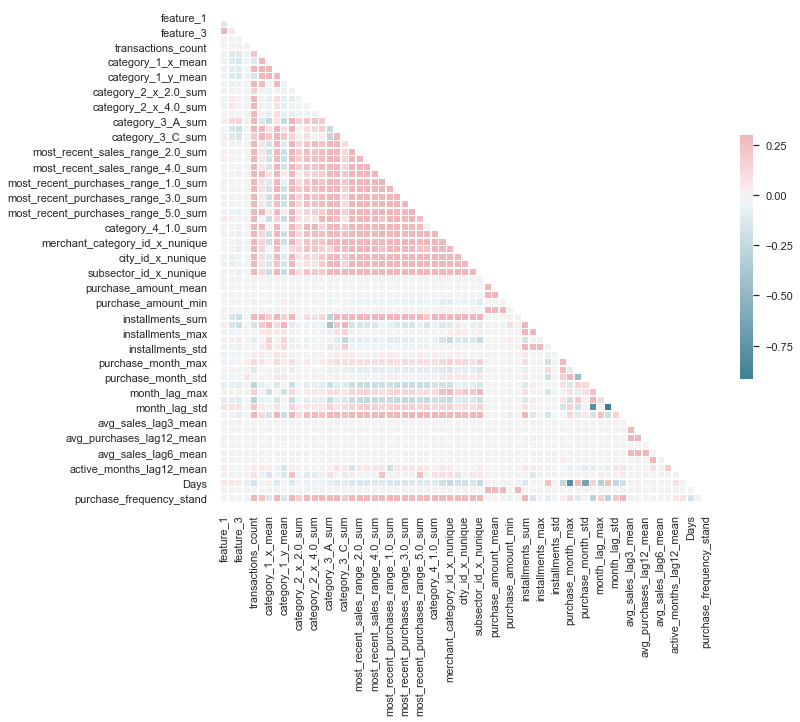

In [49]:
from string import ascii_letters

sns.set(style="white")
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Creating common method , that will perform : 
* K Fold Validations 
* Regression based on type of regression : Linear, Lasso or Ridge
* Give output as least RMSE , correspoding R Square , and the related regressor as well as X and Y frames (x_train_least,x_test_least,y_train_least,y_test_least)


In [50]:
def runLRModel(features,train=train,model='LR',step=0):
    
    global x_train_least,x_test_least,y_train_least,y_test_least
    
    global intercept_val,RSquared,globalRegressor
    
    X= train[features]
    y=train[['target']]

    cntr = 0
    RMSEBase = 0

    from sklearn.model_selection import KFold # import KFold
    kf = KFold(n_splits=5
               , shuffle=True, random_state=15) # Define the split - into 2 folds

    for train_index, test_index in kf.split(X.values):

        print("TRAIN:", train_index, "TEST:", test_index)

        x_train, x_test = X.iloc[train_index][features], X.iloc[test_index][features]
        print("X:", x_train.shape, "Xx:", x_test.shape)
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        print("y:", y_train.shape, "yy:", y_test.shape)
        
        
        if model == 'Ridge':
            regressor1 = Ridge(alpha=step+0.025)
        elif model == 'Lasso':
            regressor1 = Lasso(alpha=step+0.025)
        else:
            regressor1 = LinearRegression(normalize=True)
        
        regressor1.fit(x_train, y_train)
        predictions1 = regressor1.predict(x_test)

        RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions1))


        if cntr == 0:
            RMSEBase = RMSE
            x_train_least,x_test_least = x_train, x_test 
            y_train_least, y_test_least = y_train, y_test
            intercept_val = regressor1.intercept_
            RSquared = regressor1.score(x_test, y_test)
            globalRegressor = regressor1
        cntr = cntr + 1

        if RMSE<RMSEBase:
            RMSEBase = RMSE
            x_train_least,x_test_least = x_train, x_test 
            y_train_least, y_test_least = y_train, y_test
            intercept_val = regressor1.intercept_
            RSquared = regressor1.score(x_test, y_test)
            globalRegressor = regressor1
            
        print('RMSE:', RMSE)
        print('Linear Regression R squared: %.4f' % RSquared)
        print('Intercept',intercept_val)
    print('Least RMSE',RMSEBase)
    print('RSquared',RSquared)
    
    
#Linear Regression , with all the features generated,removing the date fields and card id and the target variables   
notfeat = ['card_id', 'first_active_month','target','purchase_date_max','purchase_date_min','purchase_date_ptp']
features = [c for c in train.columns if c not in (notfeat)]
runLRModel(features)
    
    

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 64) Xx: (40384, 64)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8338296847848246
Linear Regression R squared: 0.0255
Intercept [-4.33991692e+10]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 64) Xx: (40384, 64)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7852901065704416
Linear Regression R squared: 0.0105
Intercept [-7.23090035e+09]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 64) Xx: (40383, 64)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7325107948999836
Linear Regression R squared: 0.0251
Intercept [-4.10937962e+10]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 64) Xx: (40383, 64)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9380030502837644
Linear Regression R squa

In [51]:
x_train_least.head()

feature_1  feature_2  feature_3  transactions_count  category_1_x_sum  \
2          2          2          0                  44                 0   
3          4          3          0                  84                13   
4          1          3          0                 169                17   
5          4          2          0                  37                 1   
6          3          2          1                 265                 0   

   category_1_x_mean  category_1_y_sum  category_1_y_mean  \
2           0.000000          1.000000           0.022727   
3           0.154762         22.000000           0.261905   
4           0.100592         30.000000           0.178571   
5           0.027027          3.000000           0.081081   
6           0.000000          8.000000           0.030303   

   category_2_x_1.0_sum  category_2_x_2.0_sum  category_2_x_3.0_sum  \
2              4.000000              0.000000              0.000000   
3             25.000000              0.000000              0.000000   
4             29.000000              0.000000              7.000000   
5             36.000000              0.000000              0.000000   
6              1.000000              0.000000              0.000000   

   category_2_x_4.0_sum  category_2_x_5.0_sum  category_3_A_sum  \
2              0.000000             40.000000         44.000000   
3             59.000000              0.000000          3.000000   
4            132.000000              1.000000          1.000000   
5              0.000000              1.000000          0.000000   
6              0.000000            264.000000        265.000000   

   category_3_B_sum  category_3_C_sum  most_recent_sales_range_1.0_sum  \
2          0.000000          0.000000                         2.000000   
3         74.000000          7.000000                        19.000000   
4        160.000000          8.000000                        20.000000   
5          9.000000         28.000000                         2.000000   
6          0.000000          0.000000                        15.000000   

   most_recent_sales_range_2.0_sum  most_recent_sales_range_3.0_sum  \
2                         0.000000                         3.000000   
3                        15.000000                        16.000000   
4                        62.000000                        35.000000   
5                         3.000000                         4.000000   
6                        32.000000                        68.000000   

   most_recent_sales_range_4.0_sum  most_recent_sales_range_5.0_sum  \
2                         4.000000                        35.000000   
3                         8.000000                        26.000000   
4                         9.000000                        42.000000   
5                         6.000000                        22.000000   
6                        49.000000                       100.000000   

   most_recent_purchases_range_1.0_sum  most_recent_purchases_range_2.0_sum  \
2                             2.000000                             1.000000   
3                            19.000000                            13.000000   
4                            19.000000                            68.000000   
5                             3.000000                             4.000000   
6                             3.000000                            41.000000   

   most_recent_purchases_range_3.0_sum  most_recent_purchases_range_4.0_sum  \
2                             2.000000                             3.000000   
3                            17.000000                            10.000000   
4                            30.000000                            10.000000   
5                             6.000000                             4.000000   
6                            63.000000                            44.000000   

   most_recent_purchases_range_5.0_sum  category_4_0.0_sum  \
2                            36.000000

In [52]:
x_test_least.head()

feature_1  feature_2  feature_3  transactions_count  category_1_x_sum  \
0           5          2          1                 283                 0   
1           4          1          0                 356                31   
11          2          2          0                  20                 0   
15          2          1          0                 190                12   
18          2          1          0                  31                 0   

    category_1_x_mean  category_1_y_sum  category_1_y_mean  \
0            0.000000         19.000000           0.068592   
1            0.087079         47.000000           0.132022   
11           0.000000          0.000000           0.000000   
15           0.063158         22.000000           0.116402   
18           0.000000          2.000000           0.064516   

    category_2_x_1.0_sum  category_2_x_2.0_sum  category_2_x_3.0_sum  \
0             280.000000              0.000000              0.000000   
1             356.000000              0.000000              0.000000   
11             20.000000              0.000000              0.000000   
15             18.000000              0.000000              0.000000   
18             31.000000              0.000000              0.000000   

    category_2_x_4.0_sum  category_2_x_5.0_sum  category_3_A_sum  \
0               0.000000              3.000000        279.000000   
1               0.000000              0.000000          2.000000   
11              0.000000              0.000000         20.000000   
15              0.000000            172.000000          3.000000   
18              0.000000              0.000000          5.000000   

    category_3_B_sum  category_3_C_sum  most_recent_sales_range_1.0_sum  \
0           4.000000          0.000000                        20.000000   
1         282.000000         72.000000                        24.000000   
11          0.000000          0.000000                         0.000000   
15        162.000000         25.000000                         6.000000   
18         15.000000         11.000000                         4.000000   

    most_recent_sales_range_2.0_sum  most_recent_sales_range_3.0_sum  \
0                         62.000000                        79.000000   
1                         55.000000                        37.000000   
11                         2.000000                         2.000000   
15                        18.000000                        48.000000   
18                         4.000000                        12.000000   

    most_recent_sales_range_4.0_sum  most_recent_sales_range_5.0_sum  \
0                         45.000000                        71.000000   
1                         55.000000                       185.000000   
11                         1.000000                        15.000000   
15                        50.000000                        67.000000   
18                         6.000000                         5.000000   

    most_recent_purchases_range_1.0_sum  most_recent_purchases_range_2.0_sum  \
0                             22.000000                            42.000000   
1                             30.000000                            35.000000   
11                             1.000000                             1.000000   
15                             5.000000                            20.000000   
18                             4.000000                             5.000000   

    most_recent_purchases_range_3.0_sum  most_recent_purchases_range_4.0_sum  \
0                             68.000000                            60.000000   
1                             59.000000                            42.000000   
11                             2.000000                             0.000000   
15                            60.000000                            36.000000   
18                            12.000000                             5.000000   

    most_recent_purchases_range_5.0_sum  catego

#### We now see VIF to check if there is a scope of multicolinearty based on which we could remove fields that are highly colinear 

In [53]:
X=train[features]
X_new = X.assign(const=1)
vif_factors=pd.Series([variance_inflation_factor(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns)

In [54]:
vif_factors[vif_factors>=10].sort_values(ascending=False)

purchase_frequency_stand                       inf
most_recent_sales_range_1.0_sum                inf
purchase_amount_stand                          inf
most_recent_purchases_range_2.0_sum            inf
most_recent_purchases_range_1.0_sum            inf
most_recent_sales_range_5.0_sum                inf
most_recent_sales_range_4.0_sum                inf
most_recent_sales_range_3.0_sum                inf
most_recent_sales_range_2.0_sum                inf
category_3_C_sum                               inf
most_recent_purchases_range_5.0_sum            inf
category_3_B_sum                               inf
category_3_A_sum                               inf
category_2_x_5.0_sum                           inf
category_2_x_4.0_sum                           inf
category_2_x_3.0_sum                           inf
category_2_x_2.0_sum                           inf
category_2_x_1.0_sum                           inf
most_recent_purchases_range_4.0_sum            inf
most_recent_purchases_range_3.0

### Based on VIF results removing columns with high VIF (ignoring the infinity ones for now)
* Removing those columns doesnt make much of a difference

In [55]:
notfeat = ['card_id', 'first_active_month','target','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag3_mean','avg_purchases_lag3_mean','merchant_id_nunique','merchant_group_id_nunique']
features = [c for c in train.columns if c not in (notfeat)]
runLRModel(features)

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.834257587525456
Linear Regression R squared: 0.0253
Intercept [8.51757973e+10]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7611168355404465
Linear Regression R squared: 0.0231
Intercept [8.54965927e+09]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.732588030180515
Linear Regression R squared: 0.0250
Intercept [2.75535198e+10]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.937392421505844
Linear Regression R squared: 0

### We also try PCA as another transformation technique to see if we get features that can be reduced

In [56]:
X=train[features]
pca = PCA(.99)
principalComponents = pca.fit(X)


In [57]:
newDF = pca.transform(X)

In [58]:
newDF1 = pd.DataFrame({'PCA1':newDF[:,0],'PCA2':newDF[:,1]})

In [59]:
newDF1['target'] = train['target']

In [60]:
newDF1.head()

PCA1        PCA2    target
0 -190.319535 -121.405647 -0.820283
1 -225.492326 -127.279212  0.392913
2  -40.949159 -128.198306  0.688056
3  -65.233486 -127.504519  0.142495
4  -79.713081 -125.902376 -0.159749

### Looking at model RMSE values after PCA , we dont see our RMSE improving , also our R^2 further goes down, hence we dont consider this approach to he helpful

In [61]:
#print(features)
features=['PCA1','PCA2']
runLRModel(features,newDF1)

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 2) Xx: (40384, 2)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8832552575406605
Linear Regression R squared: 0.0002
Intercept [-0.38927124]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 2) Xx: (40384, 2)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.809972346877257
Linear Regression R squared: -0.0025
Intercept [-0.39404923]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 2) Xx: (40383, 2)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7805327712356673
Linear Regression R squared: -0.0002
Intercept [-0.40005496]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 2) Xx: (40383, 2)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.986188674691704
Linear Regression R squared: -0.0002
Interce

In [62]:
#Lasso
notfeat = ['card_id', 'first_active_month','target','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag3_mean','avg_purchases_lag3_mean','merchant_id_nunique','merchant_group_id_nunique']
features = [c for c in train.columns if c not in (notfeat)]
runLRModel(features,train,model='Lasso')

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.83827302349183
Linear Regression R squared: 0.0232
Intercept [4.37883358]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7661169361423794
Linear Regression R squared: 0.0205
Intercept [4.40250758]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.73580308626637
Linear Regression R squared: 0.0233
Intercept [4.39724236]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9401999829896717
Linear Regression R squared: 0.0233
Interce

In [63]:
#Ridge
notfeat = ['card_id', 'first_active_month','target','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag3_mean','avg_purchases_lag3_mean','merchant_id_nunique','merchant_group_id_nunique']
features = [c for c in train.columns if c not in (notfeat)]
runLRModel(features,train,model='Ridge')

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.834255078243474
Linear Regression R squared: 0.0253
Intercept [12.30804472]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 57) Xx: (40384, 57)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.761117832790171
Linear Regression R squared: 0.0231
Intercept [8.11567427]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7325528827088825
Linear Regression R squared: 0.0250
Intercept [13.07673636]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 57) Xx: (40383, 57)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9373929646051016
Linear Regression R squared: 0.0250
Int

In [66]:
# fitted values (need a constant term for intercept)
residuals = globalRegressor.predict(x_test_least)-y_test_least
model_fitted_y = globalRegressor.predict(x_test_least)

 
# model residuals
model_residuals = residuals

# normalized residuals
model_norm_residuals = StandardScaler().fit_transform(residuals);

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
#model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
#model_cooks = model_fit.get_influence().cooks_distance[0]

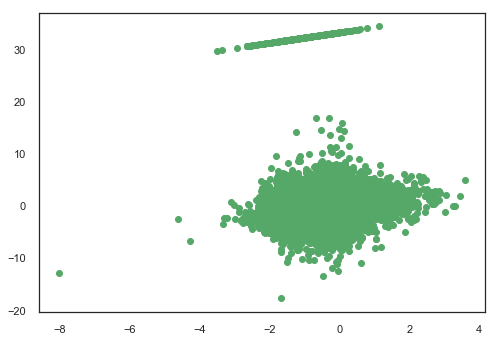

In [67]:
plt.scatter(globalRegressor.predict(x_test_least),globalRegressor.predict(x_test_least)-y_test_least,c='g')

#### We wanted to look at the distribution of the target variables as from above profiling we know that there are outliers
### Since its our response variable we would like to keep those values intact . To accomodate to this variance we try to include a new column on the predictor side 

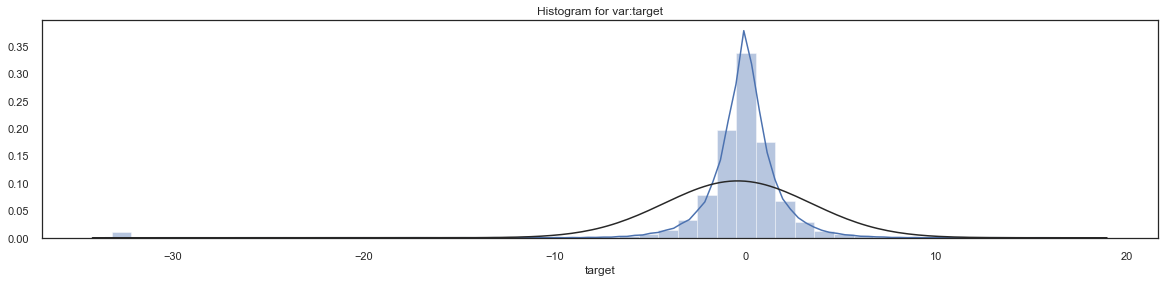

In [68]:
f, (ax1) = plt.subplots(1, 1, figsize=(20,4))
ax1.set_title('Histogram for var:' + 'target')
sns.distplot(train['target'].fillna(0),ax=ax1,fit=norm)   

In [69]:
train['OutlierAdj'] = train['target'].apply(lambda x:1 if x<=-30 else 0)


In [70]:
train[train['target']<=-30].shape

(2207, 71)

#### Incorporating this column gets our RMSE down as well as improves our R Squared drastically, having said that it doesnt mean that our model is performing well , when we used this model to get an out of sample RMSE and submit on Kaggle , our model performs even worse compared to other Models so far .

#### This clearly is a case of overfitting , hence this is not a good approach

In [71]:
notfeat = ['card_id', 'first_active_month','target','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag3_mean','avg_purchases_lag3_mean','merchant_id_nunique','merchant_group_id_nunique']
features = [c for c in train.columns if c not in (notfeat)]
runLRModel(features)

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 58) Xx: (40384, 58)
y: (161533, 1) yy: (40384, 1)
RMSE: 1.6494580538141532
Linear Regression R squared: 0.8196
Intercept [-7.39146356e+10]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 58) Xx: (40384, 58)
y: (161533, 1) yy: (40384, 1)
RMSE: 1.6644569004642913
Linear Regression R squared: 0.8196
Intercept [-7.39146356e+10]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 58) Xx: (40383, 58)
y: (161534, 1) yy: (40383, 1)
RMSE: 1.6601344611791506
Linear Regression R squared: 0.8196
Intercept [-7.39146356e+10]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 58) Xx: (40383, 58)
y: (161534, 1) yy: (40383, 1)
RMSE: 1.672313609718141
Linear Regression R squar

#### PROFILING of the final merged dataset

In [49]:
pandas_profiling.ProfileReport(train)

In [87]:
train.columns = train.columns.str.replace(".", "_")
train.drop(['OutlierAdj'], axis=1,inplace=True)
train.shape

(201917, 81)

In [88]:
# Issue in plotting
#'numerical_2_mean',
#'category_1_x_mean','purchase_amount_sum','purchase_amount_min','installments_sum','installments_mean','installments_min','purchase_month_std','month_lag_mean','month_lag_max','month_lag_min','month_lag_std','avg_sales_lag3_mean'
notfeat_plt = ['category_1_x_mean','purchase_amount_sum','purchase_amount_min','installments_sum','installments_mean','installments_min','purchase_month_std','month_lag_mean','month_lag_max','month_lag_min','month_lag_std','avg_sales_lag3_mean','numerical_2_mean','card_id', 'first_active_month','target','installments_sum','installments_mean','installments_min','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag6_mean','avg_purchases_lag3_mean','avg_purchases_lag12_mean','merchant_id_nunique','merchant_group_id_nunique','category_1_y_sum','category_1_y_mean','city_id_y_nunique','installments_std','merchant_category_id_x_nunique','merchant_group_id_nunique','most_recent_purchases_range_5_0_sum','purchase_amount_max','purchase_amount_mean','purchase_amount_stand','purchase_amount_std','purchase_frequency_stand']
features_plt = [c for c in train.columns if c not in (notfeat_plt)]

In [84]:
#This block considers all variables and can be used iteratively to minimize re-running code
#We can limit the variables of interest if we want to
def Plot(varname,dataset):   
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,4))
    x = dataset[varname].dropna()
    #x = x[x>0]
    x = x.replace(to_replace=0, value=1)
    x = x[~x.isnull()]
    x = x.astype(int)
    if len(set(x)) == 1:
        return
    ax1.set_title('Before Transformation for var:' + varname)
    ax2.set_title('After Log for var:' + varname)
    ax3.set_title('After Sqrt for var:' + varname)
    ax4.set_title('After BoxCox for var:' + varname)
    
    #sns.distplot(dataset[varname].fillna(0),ax=ax1,fit=norm)   
    #sns.distplot((np.log(dataset[varname]).fillna(0)),ax=ax2,fit=norm)
    #sns.distplot((np.sqrt(dataset[varname]).fillna(0)),ax=ax3,fit=norm)
    sns.distplot(x.fillna(0),ax=ax1,fit=norm)   
    sns.distplot((np.log(x).fillna(0)),ax=ax2,fit=norm)
    sns.distplot((np.sqrt(x).fillna(0)),ax=ax3,fit=norm)
    sns.distplot(stats.boxcox(x)[0],ax=ax4,fit=norm)    
    #f.savefig(varname+".png")
    plt.show()

Plotting for Var :feature_1


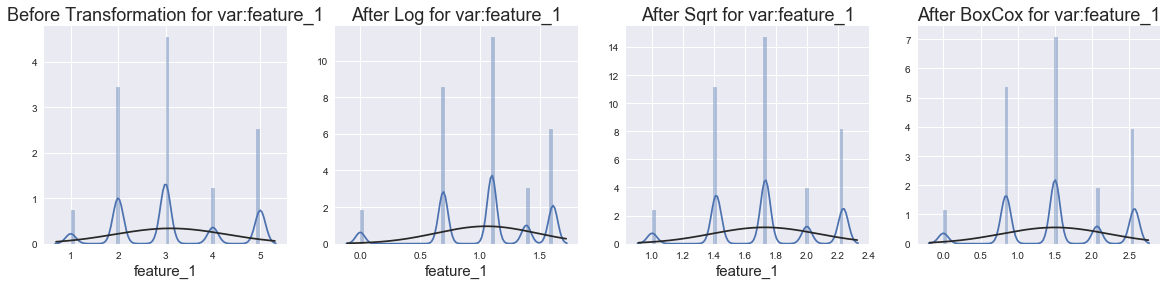

Plotting for Var :feature_2


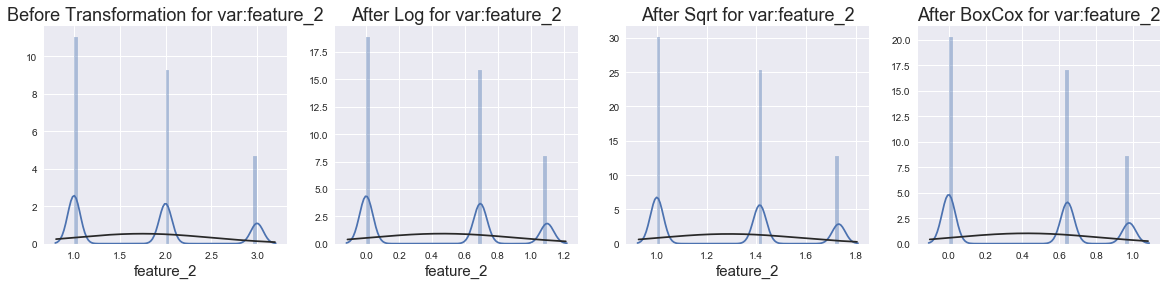

Plotting for Var :feature_3
Plotting for Var :transactions_count


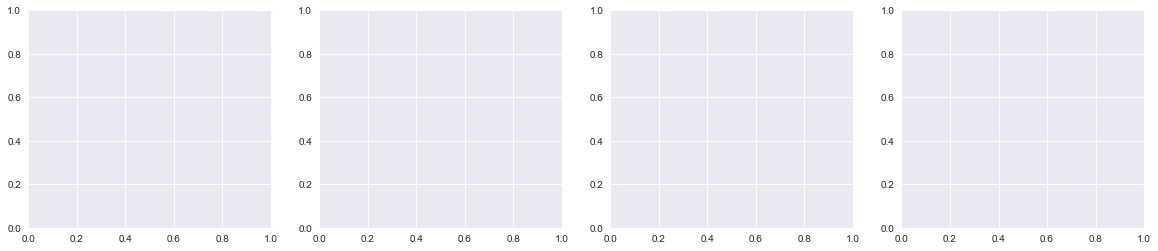

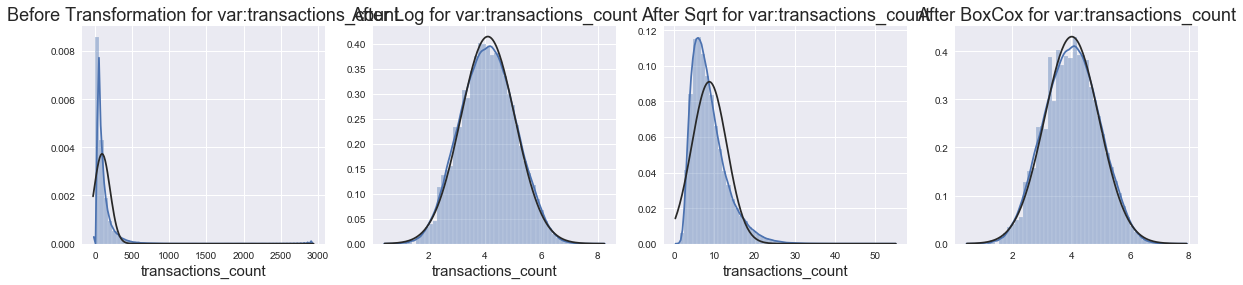

Plotting for Var :category_1_x_sum


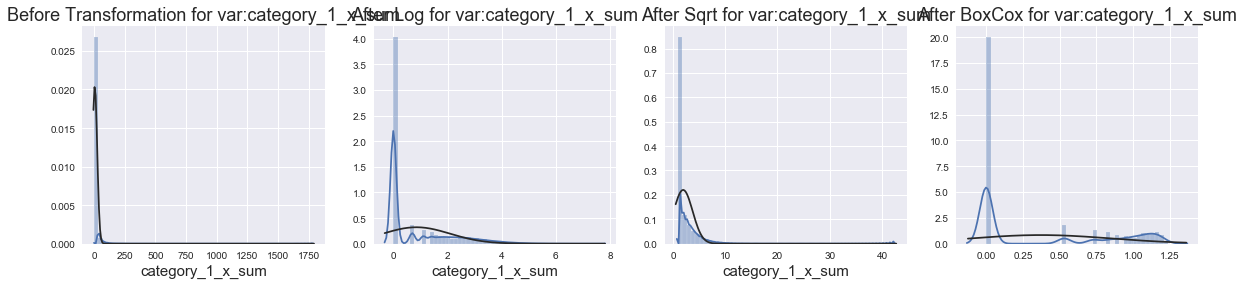

Plotting for Var :category_2_x_1.0_sum


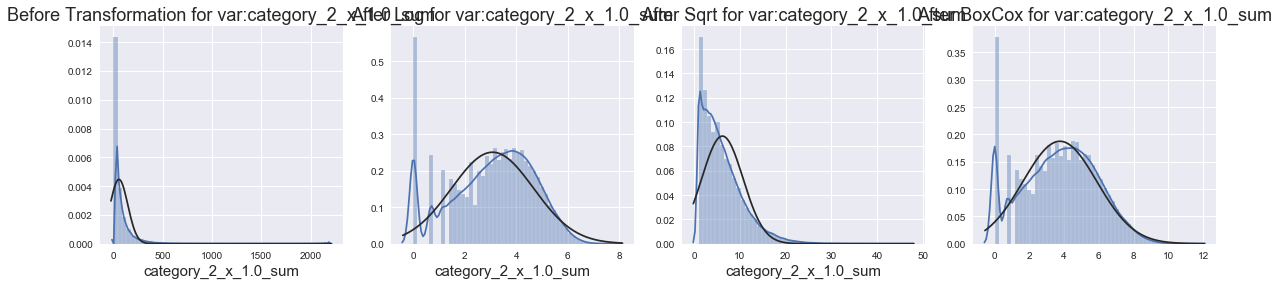

Plotting for Var :category_2_x_2.0_sum


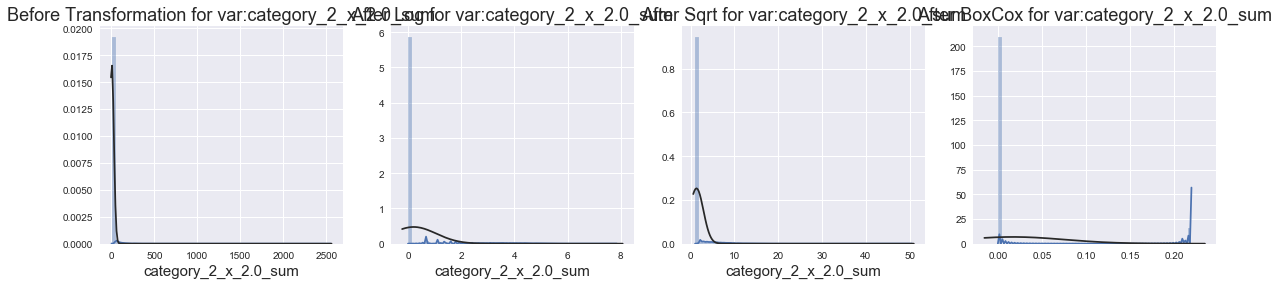

Plotting for Var :category_2_x_3.0_sum


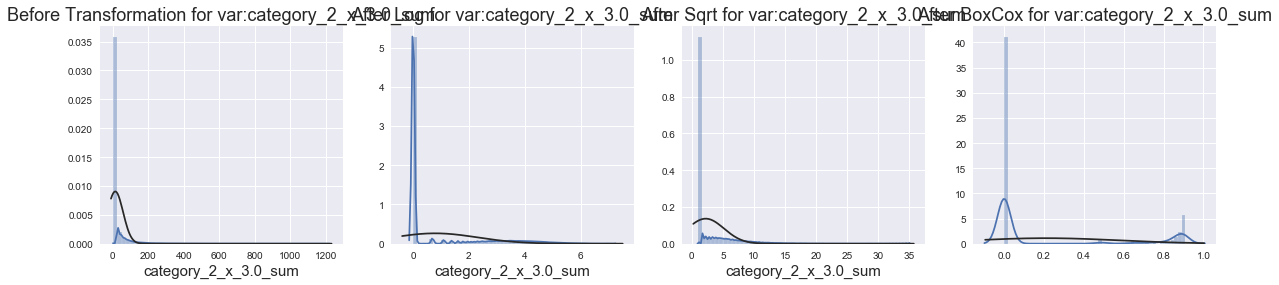

Plotting for Var :category_2_x_4.0_sum


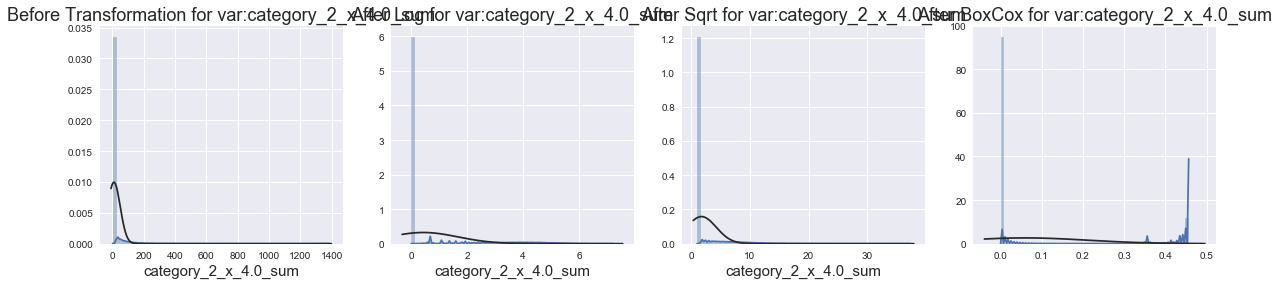

Plotting for Var :category_2_x_5.0_sum


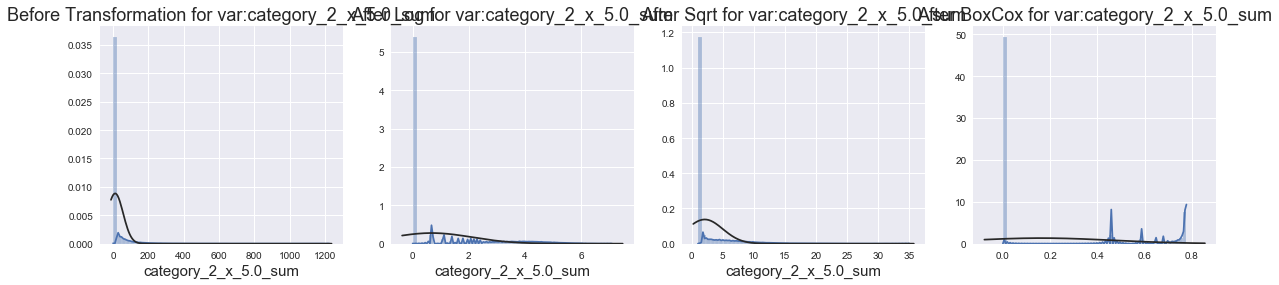

Plotting for Var :category_3_A_sum


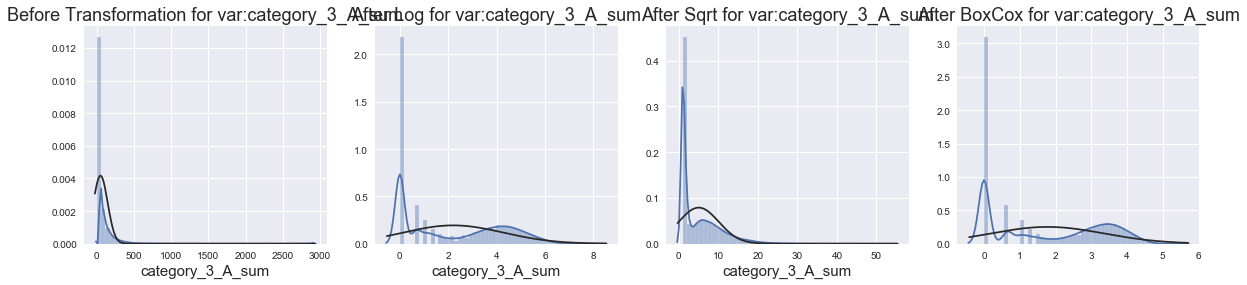

Plotting for Var :category_3_B_sum


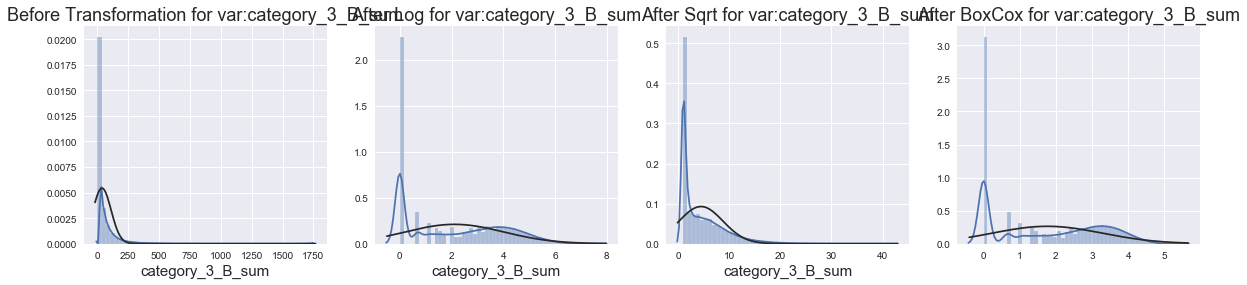

Plotting for Var :category_3_C_sum


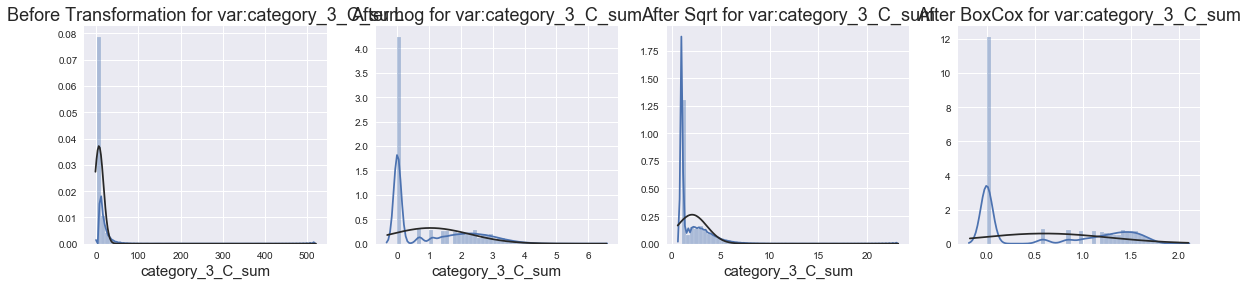

Plotting for Var :most_recent_sales_range_1.0_sum


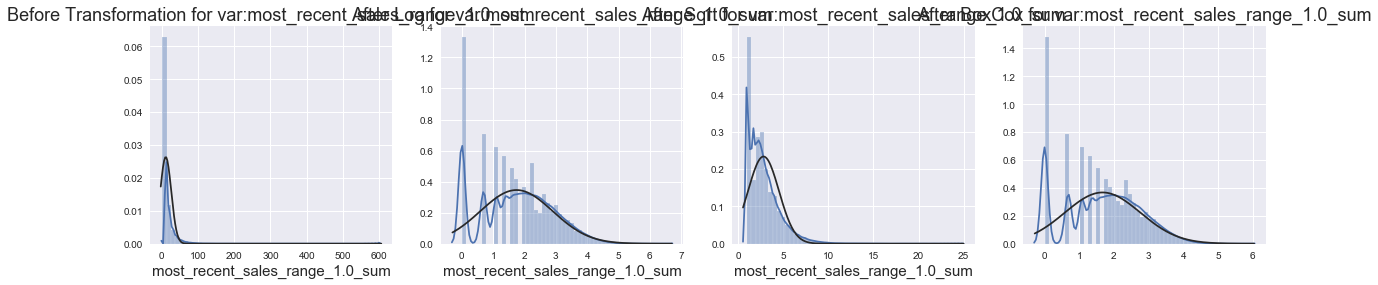

Plotting for Var :most_recent_sales_range_2.0_sum


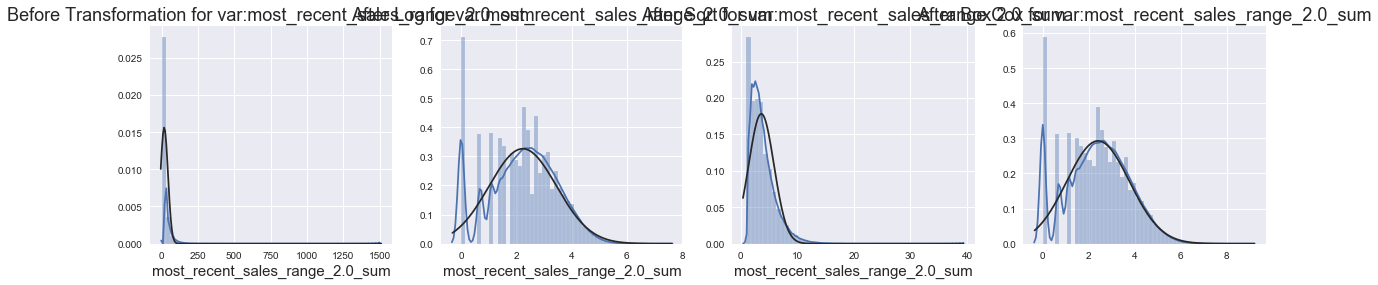

Plotting for Var :most_recent_sales_range_3.0_sum


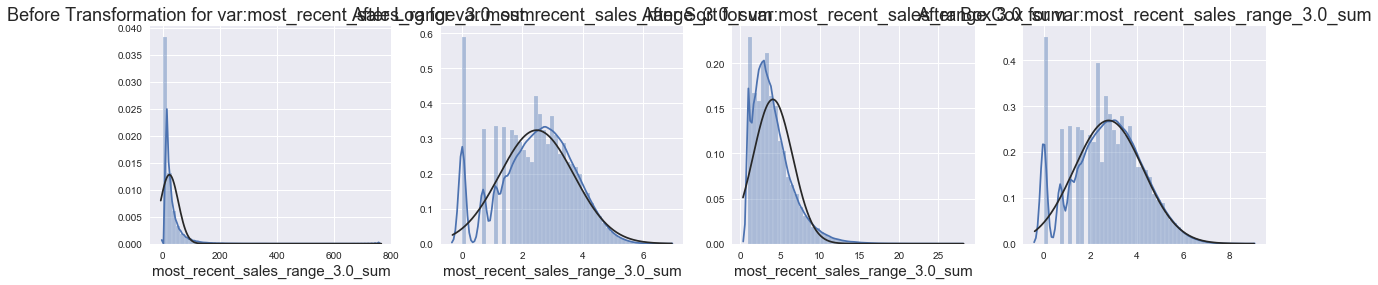

Plotting for Var :most_recent_sales_range_4.0_sum


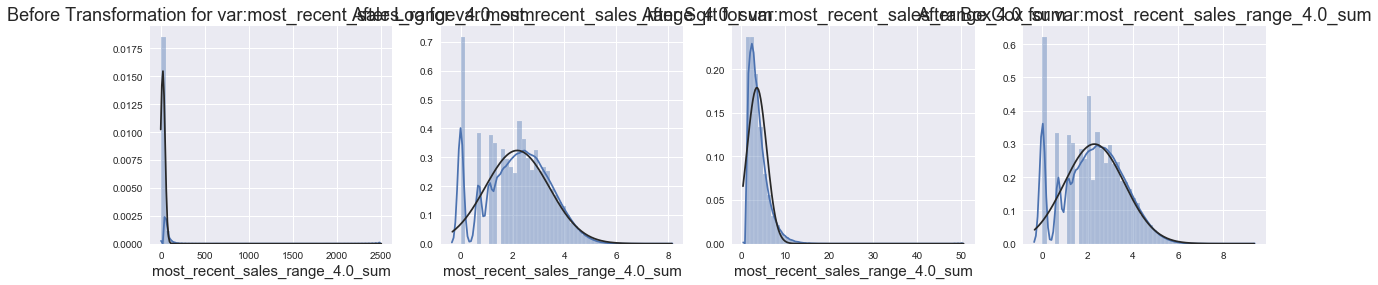

Plotting for Var :most_recent_sales_range_5.0_sum


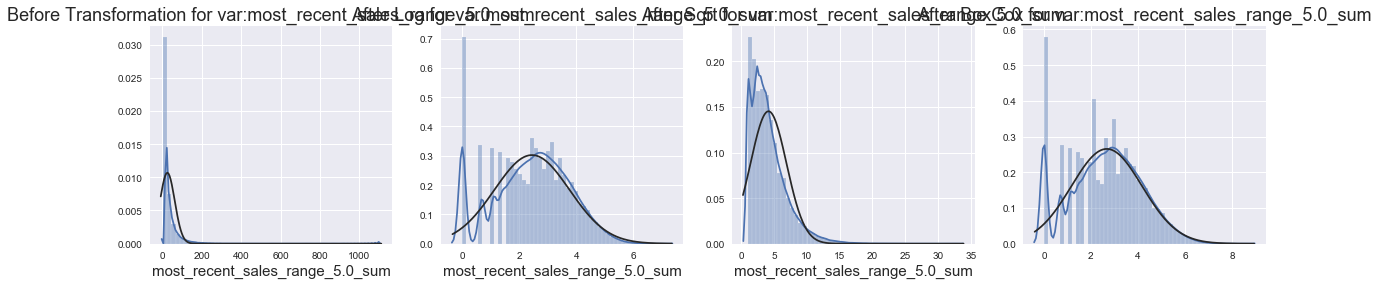

Plotting for Var :most_recent_purchases_range_1.0_sum


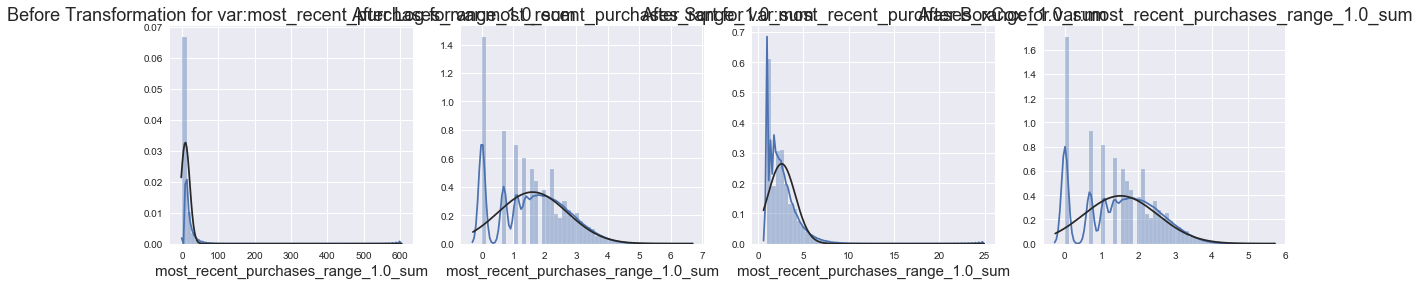

Plotting for Var :most_recent_purchases_range_2.0_sum


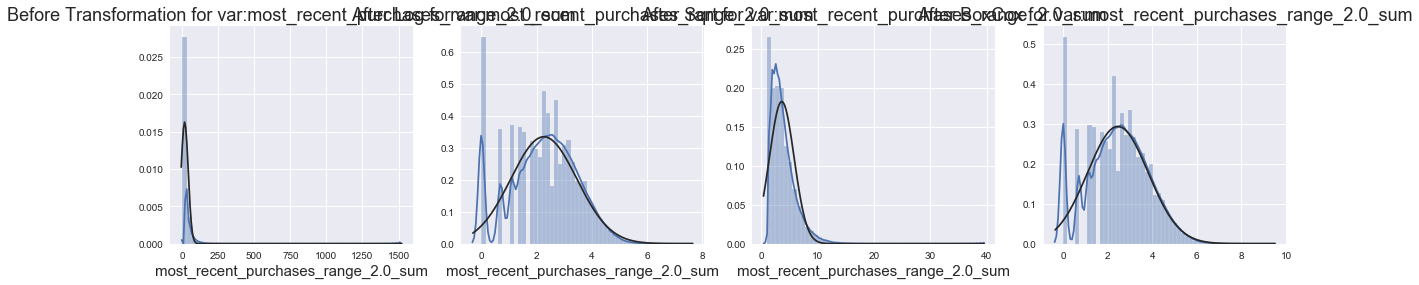

Plotting for Var :most_recent_purchases_range_3.0_sum


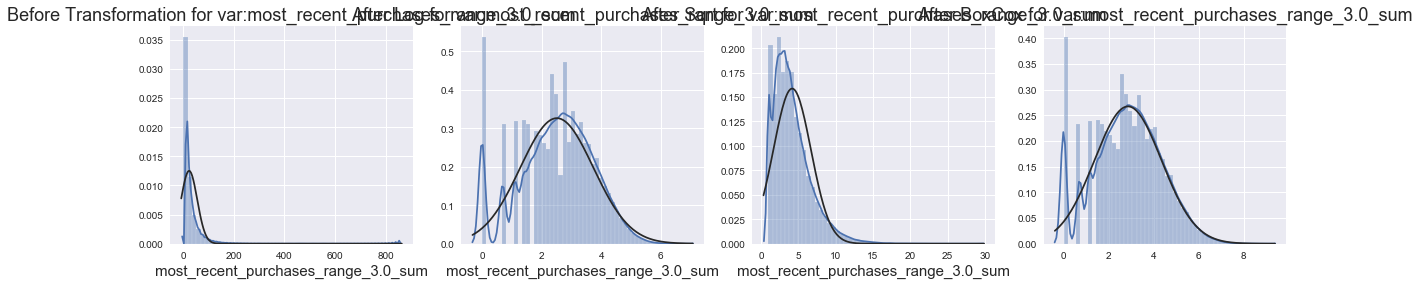

Plotting for Var :most_recent_purchases_range_4.0_sum


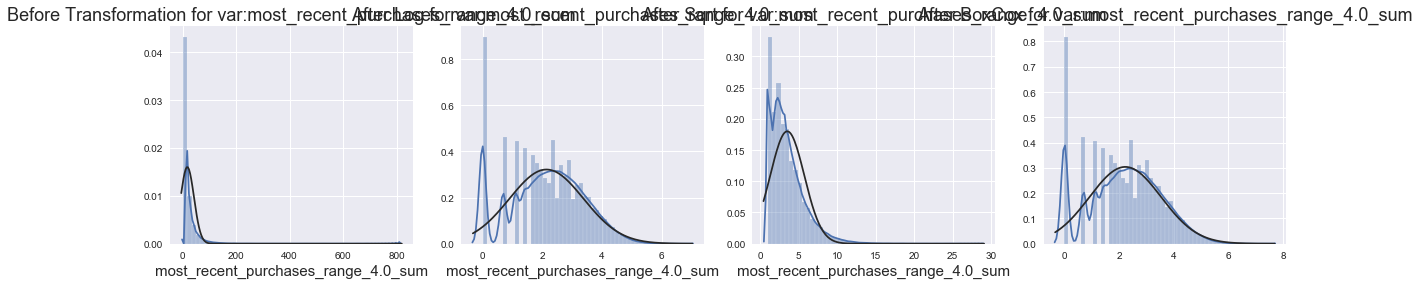

Plotting for Var :most_recent_purchases_range_5.0_sum


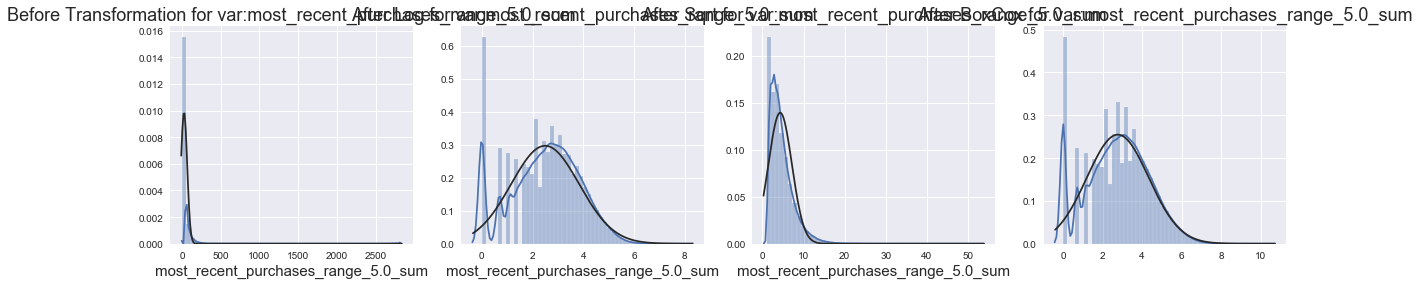

Plotting for Var :category_4_0.0_sum


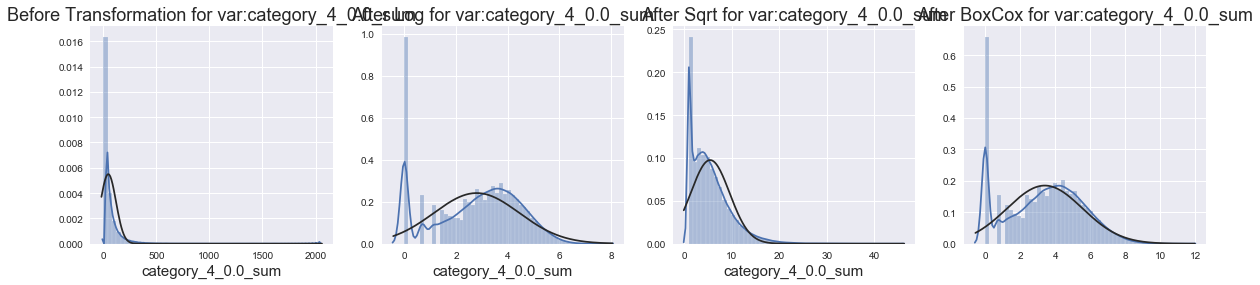

Plotting for Var :category_4_1.0_sum


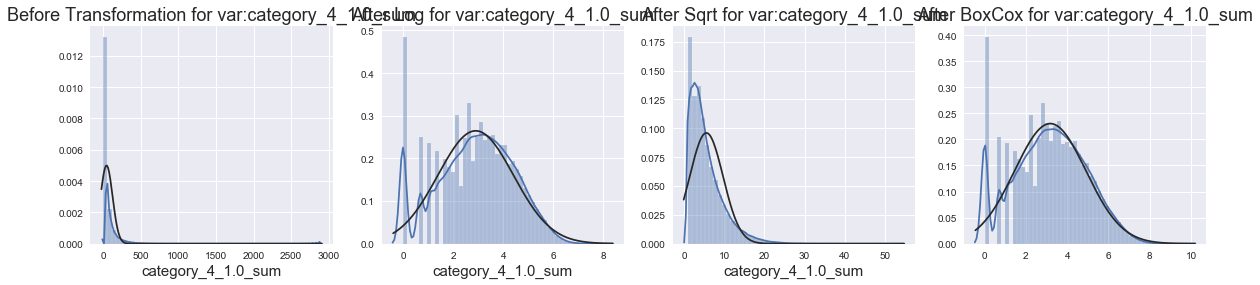

Plotting for Var :state_id_x_nunique


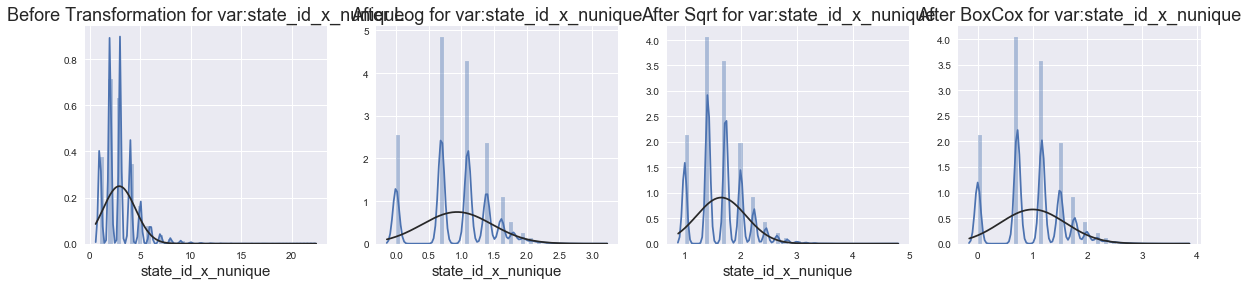

Plotting for Var :city_id_x_nunique


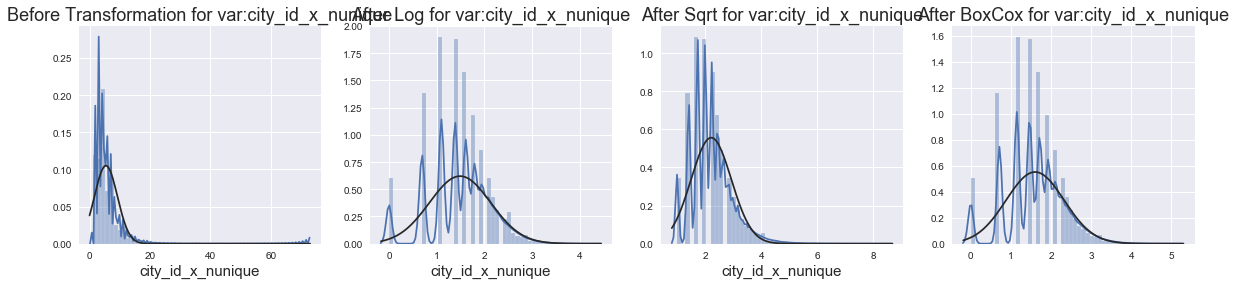

Plotting for Var :subsector_id_x_nunique


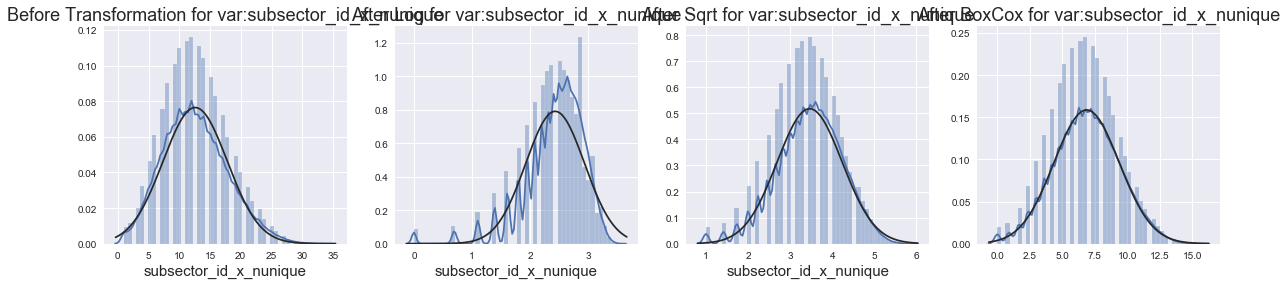

Plotting for Var :installments_max


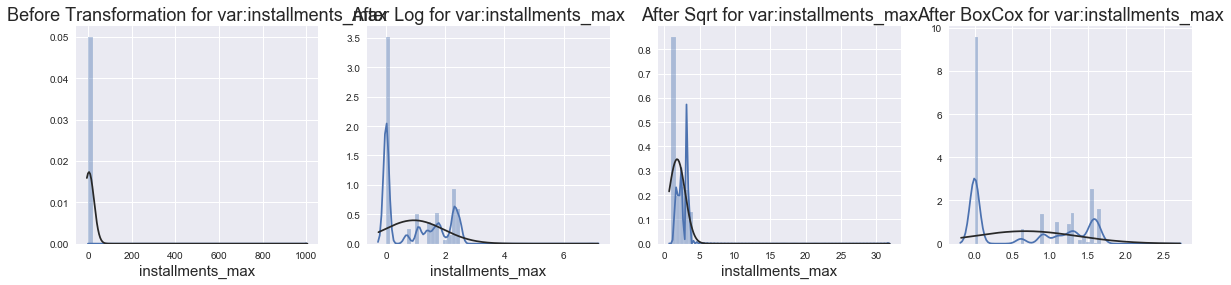

Plotting for Var :purchase_month_mean


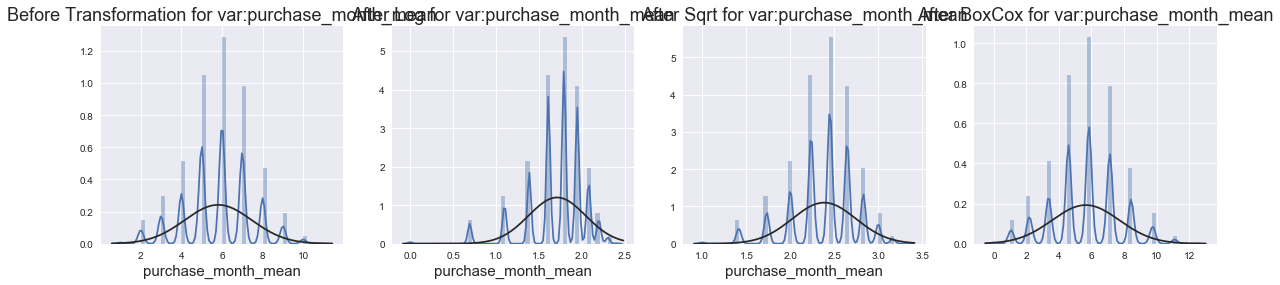

Plotting for Var :purchase_month_max


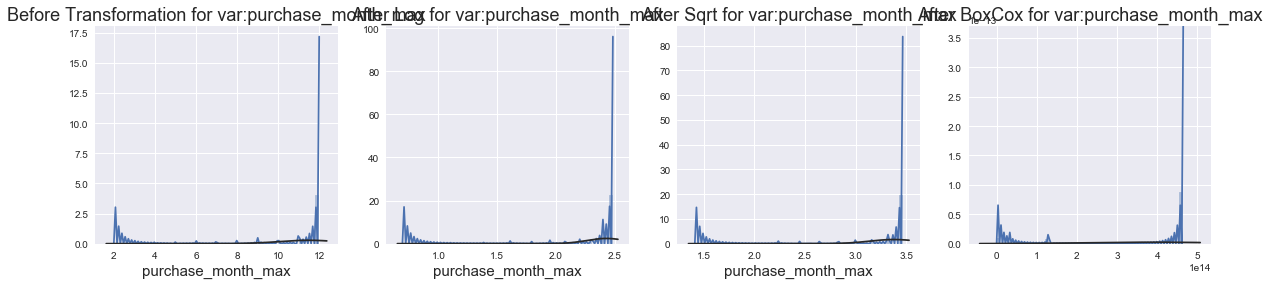

Plotting for Var :purchase_month_min


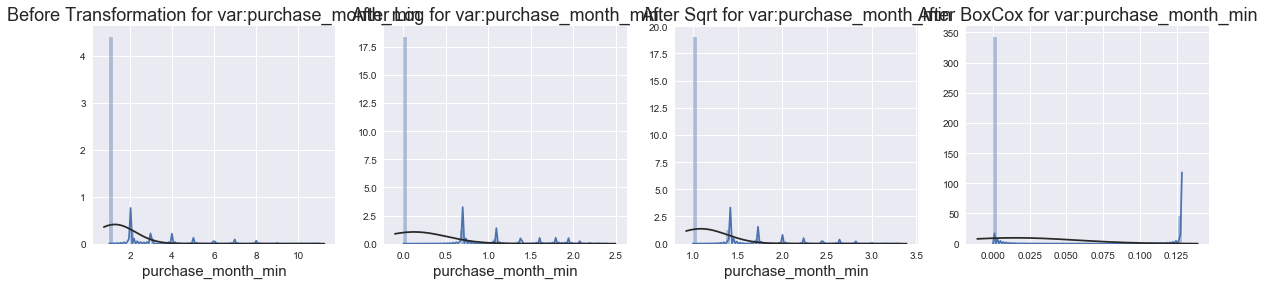

Plotting for Var :active_months_lag3_mean


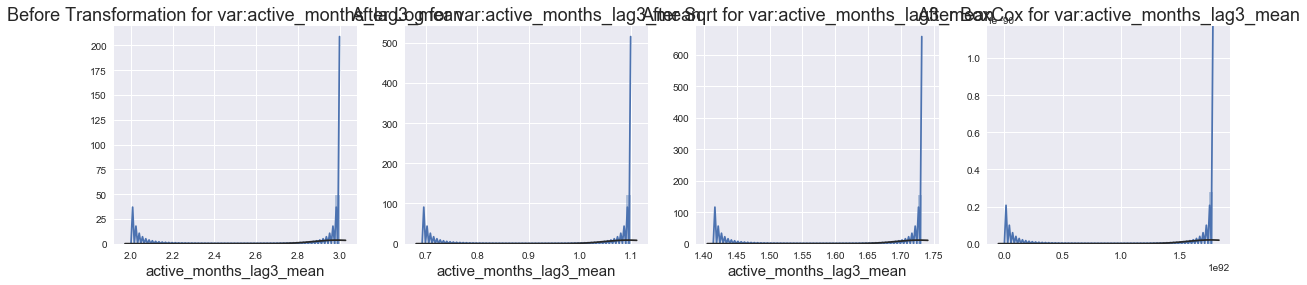

Plotting for Var :active_months_lag6_mean


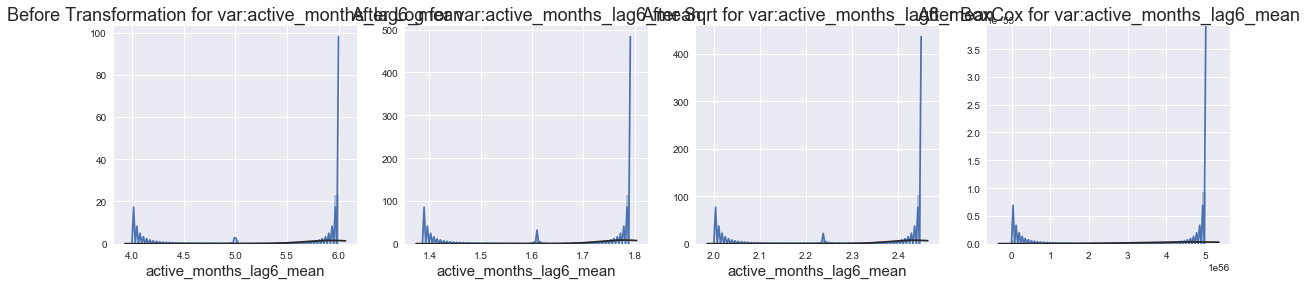

Plotting for Var :active_months_lag12_mean


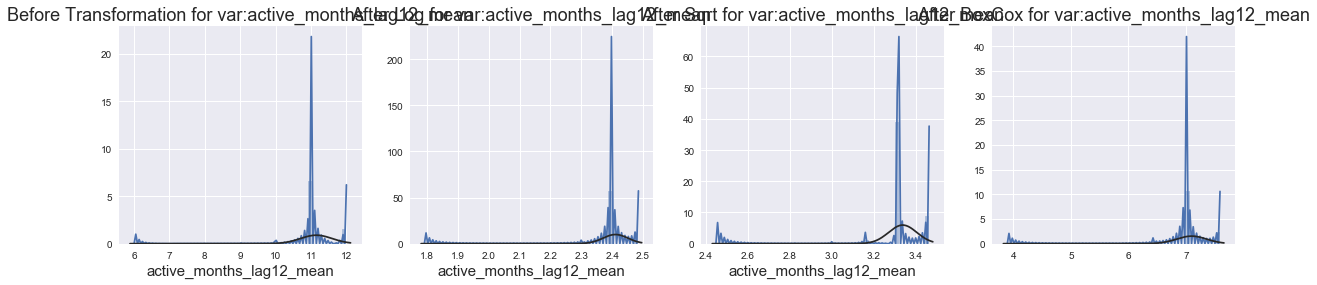

Plotting for Var :Days


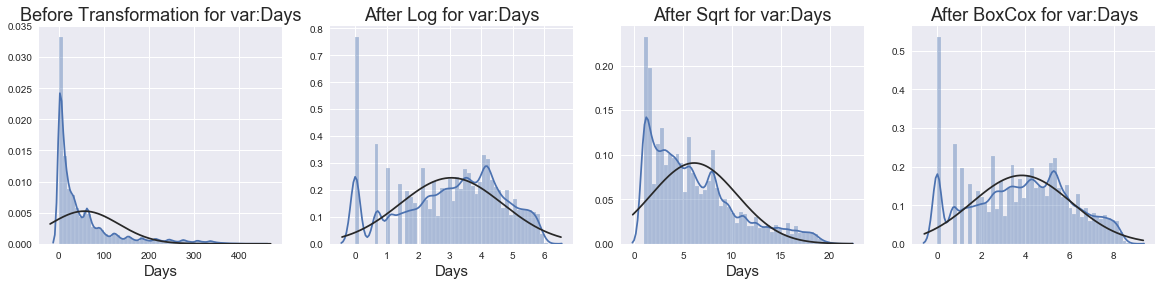

Plotting for Var :OutlierAdj


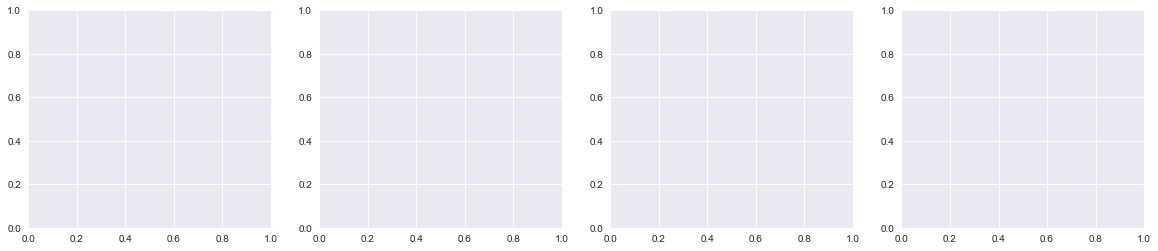

In [78]:
for i in train[features_plt].columns:   
    print("Plotting for Var :{}".format(i))
    Plot(i,train[features_plt])

#### Improving Model accuracy based on transformations and feature selection (from profiling output of merged train dataset)

In [89]:
from scipy import stats
train['log_transactions_count'] = np.log(train['transactions_count'].replace(to_replace=0, value=0.00001))
train['log_category_2_x_1_0_sum'] = np.log(train['category_2_x_1_0_sum'].replace(to_replace=0, value=0.00001))
train['sqrt_category_3_A_sum'] = np.sqrt(train['category_3_A_sum'])
train['sqrt_category_3_C_sum'] = np.sqrt(train['category_3_C_sum'])
train['log_most_recent_sales_range_1_0_sum'] = np.log(train['most_recent_sales_range_1_0_sum'].replace(to_replace=0, value=0.00001))
train['log_most_recent_sales_range_2_0_sum'] = np.log(train['most_recent_sales_range_2_0_sum'].replace(to_replace=0, value=0.00001))
train['log_most_recent_purchases_range_1_0_sum'] = np.log(train['most_recent_purchases_range_1_0_sum'].replace(to_replace=0, value=0.00001))
train['log_most_recent_purchases_range_3_0_sum'] = np.log(train['most_recent_purchases_range_3_0_sum'].replace(to_replace=0, value=0.00001))
train['log_category_4_0_0_sum'] = np.log(train['category_4_0_0_sum'].replace(to_replace=0, value=0.00001))
train['log_category_4_1_0_sum'] = np.log(train['category_4_1_0_sum'].replace(to_replace=0, value=0.00001))
train['sqrt_city_id_x_nunique'] = np.log(train['city_id_x_nunique'].replace(to_replace=0, value=0.00001))
#train['log_numerical_2_mean'] = np.log(train['numerical_2_mean'].replace(to_replace=0, value=0.00001))

#notfeat = ['card_id', 'first_active_month','target','transactions_count','category_2_x_1_0_sum','category_3_A_sum','category_3_B_sum','category_3_C_sum','most_recent_sales_range_1_0_sum','most_recent_sales_range_2_0_sum','most_recent_sales_range_3_0_sum','most_recent_sales_range_4_0_sum','most_recent_sales_range_5_0_sum','most_recent_purchases_range_1_0_sum','most_recent_purchases_range_2_0_sum','most_recent_purchases_range_3_0_sum','most_recent_purchases_range_4_0_sum','category_4_0_0_sum','category_4_1_0_sum','city_id_x_nunique','Days','category_1_x_sum','installments_sum','installments_mean','installments_min','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag6_mean','avg_purchases_lag3_mean','avg_purchases_lag12_mean','merchant_id_nunique','merchant_group_id_nunique','category_1_y_sum','category_1_y_mean','city_id_y_nunique','installments_std','merchant_category_id_x_nunique','merchant_group_id_nunique','most_recent_purchases_range_5_0_sum','purchase_amount_max','purchase_amount_mean','purchase_amount_stand','purchase_amount_std','purchase_frequency_stand']
notfeat = ['card_id', 'first_active_month','target','city_id_x_nunique','category_4_0_0_sum','category_4_1_0_sum','most_recent_purchases_range_3_0_sum','most_recent_purchases_range_1_0_sum','transactions_count','category_2_x_1_0_sum','category_3_A_sum','category_3_C_sum','most_recent_sales_range_1_0_sum','most_recent_sales_range_2_0_sum','installments_sum','installments_mean','installments_min','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag6_mean','avg_purchases_lag3_mean','avg_purchases_lag12_mean','merchant_id_nunique','merchant_group_id_nunique','category_1_y_sum','category_1_y_mean','city_id_y_nunique','installments_std','merchant_category_id_x_nunique','merchant_group_id_nunique','most_recent_purchases_range_5_0_sum','purchase_amount_max','purchase_amount_mean','purchase_amount_stand','purchase_amount_std','purchase_frequency_stand']
features = [c for c in train.columns if c not in (notfeat)]

In [90]:
# Iterating with different Alpha values
i = 0
step=1000
while i <100:
    print("==================================Iteration 1, learning Rate = {}==================================".format(step))
    runLRModel(features,train,model='Ridge',step = step)
    i+=1
    step+=0.5
    
# Most optimum RMSE at alpha = 1021    

==================================Iteration 1, learning Rate = 1000==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830574225757378
Linear Regression R squared: 0.0271
Intercept [4.10268885]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7589473408762717
Linear Regression R squared: 0.0242
Intercept [4.56645522]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286350450572066
Linear Regression R squared: 0.0271
Intercept [4.02003841]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (4038

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459153006381314
Linear Regression R squared: 0.0271
Intercept [4.0210548]
Least RMSE 3.728635034844584
RSquared 0.027087481729353602
==================================Iteration 1, learning Rate = 1003.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830575190807464
Linear Regression R squared: 0.0271
Intercept [4.10350788]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7589481728702143
Linear Regression R squared: 0.0242
Intercept [4.56667424]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.935531335141201
Linear Regression R squared: 0.0271
Intercept [4.02226896]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459158629973754
Linear Regression R squared: 0.0271
Intercept [4.02226896]
Least RMSE 3.7286350243002317
RSquared 0.02708748723202803
==================================Iteration 1, learning Rate = 1006.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830576156131692
Linear Regression R squared: 0.0271
Intercept [4.104323]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758949

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286350156150228
Linear Regression R squared: 0.0271
Intercept [4.02347717]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355314396226144
Linear Regression R squared: 0.0271
Intercept [4.02347717]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.745916425531066
Linear Regression R squared: 0.0271
Intercept [4.02347717]
Least RMSE 3.7286350156150228
RSquared 0.027087491764490212
==================================Iteration 1, learning Rate = 1009.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.83

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.728635008781394
Linear Regression R squared: 0.0271
Intercept [4.02467948]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355315447804227
Linear Regression R squared: 0.0271
Intercept [4.02467948]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459169882370826
Linear Regression R squared: 0.0271
Intercept [4.02467948]
Least RMSE 3.728635008781394
RSquared 0.027087495330686884
==================================Iteration 1, learning Rate = 1012.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286350037918226
Linear Regression R squared: 0.0271
Intercept [4.02587592]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.935531650611085
Linear Regression R squared: 0.0271
Intercept [4.02587592]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.745917551113314
Linear Regression R squared: 0.0271
Intercept [4.02587592]
Least RMSE 3.7286350037918226
RSquared 0.027087497934543903
==================================Iteration 1, learning Rate = 1015.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830

RMSE: 3.7589521911649224
Linear Regression R squared: 0.0242
Intercept [4.56772281]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.728635000638824
Linear Regression R squared: 0.0271
Intercept [4.02706654]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355317571110864
Linear Regression R squared: 0.0271
Intercept [4.02706654]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.745918114157667
Linear Regression R squared: 0.0271
Intercept [4.02706654]
Least RMSE 3.728635000638824
RSquared 0.02708749957996759
==================================Iteration 1, learning Rate = 1018.0==========================

RMSE: 3.8305808255143803
Linear Regression R squared: 0.0271
Intercept [4.10820867]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7589530219108176
Linear Regression R squared: 0.0242
Intercept [4.5679377]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286349993149517
Linear Regression R squared: 0.0271
Intercept [4.0282514]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.93553186427694
Linear Regression R squared: 0.0271
Intercept [4.0282514]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) 

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305817923050474
Linear Regression R squared: 0.0271
Intercept [4.10900159]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.7589538524413406
Linear Regression R squared: 0.0242
Intercept [4.56815189]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.728634999812801
Linear Regression R squared: 0.0271
Intercept [4.02943052]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355319721051822
Linear Regression R squared: 0.0271
Inte

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.745919710344853
Linear Regression R squared: 0.0271
Intercept [4.03040879]
Least RMSE 3.7286350016139496
RSquared 0.02708749907108854
==================================Iteration 1, learning Rate = 1026.5==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830582759325144
Linear Regression R squared: 0.0271
Intercept [4.10979081]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758954682756087
Linear Regression R squared: 0.0242
Intercept [4.56836539]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.72863

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459202740145265
Linear Regression R squared: 0.0271
Intercept [4.03157753]
Least RMSE 3.728635005432508
RSquared 0.02708749707833613
==================================Iteration 1, learning Rate = 1029.5==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305837265684666
Linear Regression R squared: 0.0271
Intercept [4.11057635]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758955512854656
Linear Regression R squared: 0.0242
Intercept [4.56857819]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286

RMSE: 3.93553228118571
Linear Regression R squared: 0.0271
Intercept [4.03274067]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459208378424003
Linear Regression R squared: 0.0271
Intercept [4.03274067]
Least RMSE 3.728635011052007
RSquared 0.02708749414574496
==================================Iteration 1, learning Rate = 1032.5==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305846940288966
Linear Regression R squared: 0.0271
Intercept [4.11135823]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758956342736652
Linear Regression R squared: 0.0242
Intercept [4.56

RMSE: 3.728635018465185
Linear Regression R squared: 0.0271
Intercept [4.03389825]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.935532391521495
Linear Regression R squared: 0.0271
Intercept [4.03389825]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459214018264633
Linear Regression R squared: 0.0271
Intercept [4.03389825]
Least RMSE 3.728635018465185
RSquared 0.027087490277104664
==================================Iteration 1, learning Rate = 1035.5==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305856617003955
Linear Regression R squared: 0.0271
Intercept [4.

RMSE: 3.7589578636231895
Linear Regression R squared: 0.0242
Intercept [4.56917741]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286350276648186
Linear Regression R squared: 0.0271
Intercept [4.03505032]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355325025032895
Linear Regression R squared: 0.0271
Intercept [4.03505032]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459219659647154
Linear Regression R squared: 0.0271
Intercept [4.03505032]
Least RMSE 3.7286350276648186
RSquared 0.027087485476185003
==================================Iteration 1, learning Rate = 1038.5======================

RMSE: 3.830587436293286
Linear Regression R squared: 0.0271
Intercept [4.11355395]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758958692889445
Linear Regression R squared: 0.0242
Intercept [4.56938759]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.728635038643719
Linear Regression R squared: 0.0271
Intercept [4.03619691]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.935532614127778
Linear Regression R squared: 0.0271
Intercept [4.03619691]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1)

X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305884045307224
Linear Regression R squared: 0.0271
Intercept [4.11432207]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758959521937648
Linear Regression R squared: 0.0242
Intercept [4.5695971]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286350513947366
Linear Regression R squared: 0.0271
Intercept [4.03733806]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.935532726391667
Linear Regression R squared: 0.0271
Intercept [4.03733806]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 20189

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459235651764624
Linear Regression R squared: 0.0271
Intercept [4.03828491]
Least RMSE 3.728635063369152
RSquared 0.02708746684352603
==================================Iteration 1, learning Rate = 1047.0==================================
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.8305893729568177
Linear Regression R squared: 0.0271
Intercept [4.11508666]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758960350767421
Linear Regression R squared: 0.0242
Intercept [4.56980593]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7286

X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355329338586307
Linear Regression R squared: 0.0271
Intercept [4.0394162]
TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     3     10     13 ... 201896 201908 201913]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.7459241298875146
Linear Regression R squared: 0.0271
Intercept [4.0394162]
Least RMSE 3.7286350793506005
RSquared 0.02708745850344907


#### Based on the above model optimization on learning rate applied on Ridge regression we found that learning rate = 1021-0.025 is the optimal rate , hence running the final model using that step value with the least RMSE

In [91]:

runLRModel(features,train,model='Ridge',step = 1021-0.025)

TRAIN: [     0      1      2 ... 201914 201915 201916] TEST: [     4      5      6 ... 201904 201907 201911]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.830580978574026
Linear Regression R squared: 0.0271
Intercept [4.10833446]
TRAIN: [     0      1      2 ... 201913 201915 201916] TEST: [     9     12     23 ... 201903 201910 201914]
X: (161533, 45) Xx: (40384, 45)
y: (161533, 1) yy: (40384, 1)
RMSE: 3.758953153425845
Linear Regression R squared: 0.0242
Intercept [4.56797166]
TRAIN: [     2      3      4 ... 201913 201914 201915] TEST: [     0      1     11 ... 201909 201912 201916]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.728634999272583
Linear Regression R squared: 0.0271
Intercept [4.02843847]
TRAIN: [     0      1      3 ... 201913 201914 201916] TEST: [     2      7     16 ... 201900 201905 201915]
X: (161534, 45) Xx: (40383, 45)
y: (161534, 1) yy: (40383, 1)
RMSE: 3.9355318813056974
Linear Regression R squared: 0.0271
Interc

#### We now try to use a different library StatsModels to apply OLS Regression 

In [92]:
### Method to cut short the dataset so that we can apply models with faster performance
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [110]:
train = reduce_mem_usage(train)

Mem. usage decreased to 38.32 Mb (69.7% reduction)


#### Due to kernel and memory limitations we take a sample of our merged train dataset and apply OLS 
* We check the diagnostic plots post OLS 
* Residual Plot : We observe that the residuals are not random , also they are concentrated at the center , also we observe outliers 
* Normal QQ Plot : The QQ plot also shows that there residuals are not normally distributed 


* Our assumptions are violated , hence we can summarize that our model can do better 
* We have only tried to apply linear regression methods , we intended to apply Random Forest and other Ensemble based techniqies , however they are out of scope for this submission of ours

In [111]:
train_sample = train.sample(frac=0.1)
print(train_sample.shape)

(20192, 81)


In [113]:
X = train_sample[features]
y= train_sample['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [114]:
print(X.shape)

(20192, 45)


In [115]:
model = smf.OLS(y_train,X_train)
model_fit = model.fit()

In [116]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:50:07   Log-Likelihood:                -38961.
No. Observations:               14134   AIC:                         7.801e+04
Df Residuals:                   14090   BIC:                         7.834e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
feature_1                                   0.0452      0.035      1.276      0.202      -0.024       0.115
feature_2                                  -0.0635      0.045     -1.411      0.158      -0.152       0.025
feature_3                                  -0.2442      0.088     -2.789      0.005      -0.416      -0.073
category_1_x_sum                           -0.0058      0.003     -2.301      0.021      -0.011      -0.001
category_1_x_mean                          -0.9890      0.263     -3.762      0.000      -1.504      -0.474
category_2_x_2_0_sum                       -0.0036      0.001     -2.459      0.014      -0.007      -0.001
category_2_x_3_0_sum                     8.823e-05      0.001      0.101      0.920      -0.002       0.002
category_2_x_4_0_sum                       -0.0007      0.001     -0.772      0.440      -0.003       0.001
category_2_x_5_0_sum                       -0.0009      0.001     -1.169      0.243      -0.002       0.001
category_3_B_sum                            0.0035      0.001      2.786      0.005       0.001       0.006
most_recent_sales_range_3_0_sum         -7.053e-05      0.002     -0.036      0.971      -0.004       0.004
most_recent_sales_range_4_0_sum            -0.0001      0.003     -0.045      0.964      -0.005       0.005
most_recent_sales_range_5_0_sum             0.0005      0.002      0.314      0.753      -0.003       0.004
most_recent_purchases_range_2_0_sum        -0.0004      0.002     -0.175      0.861      -0.005       0.004
most_recent_purchases_range_4_0_sum        -0.0005      0.003     -0.193      0.847      -0.006       0.005
state_id_x_nunique                          0.0263      0.032      0.815      0.415      -0.037       0.089
subsector_id_x_nunique                      0.0004      0.013      0.032      0.974      -0.024       0.025
purchase_amount_sum                     -2.103e-08   1.31e-05     -0.002      0.999   -2.57e-05    2.56e-05
purchase_amount_min                        -0.4572      0.711     -0.643      0.520      -1.851       0.936
installments_max                           -0.0034      0.001     -2.687      0.007      -0.006      -0.001
purchase_month_mean                         0.0244      0.025      0.974      0.330      -0.025       0.073
purchase_month_max                         -0.4058      0.046     -8.737      0.000      -0.497      -0.315
purchase_month_min                          0.1554      0.044      3.541      0.000       0.069       0.241
purchase_month_std                          0.2166      0.061      3.523      0.000       0.096       0.337
month_lag_mean                             -0.2457      0.035     -7.011      0.000      -0.314      -0.177
month_lag_max                              -0.1847      0.0

In [118]:
from sklearn.metrics import roc_curve,auc,mean_squared_error, r2_score

In [119]:
predictions = model_fit.predict(X_test)
#print(predictions)
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, predictions)))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(y_test, predictions))

Root Mean squared error: 3.84
Variance score: 0.02


In [120]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [121]:
len(features)

45

In [122]:
model_fit.params.shape

(45,)

In [123]:
model_fitted_y.head()

19149    -0.035552
176924    0.165706
45726    -1.642265
4263      0.950159
73738    -0.259579
dtype: float32

In [124]:
Z = X_train

In [125]:
Z['target'] = y_train

In [126]:
Z.head()

feature_1  feature_2  feature_3  category_1_x_sum  category_1_x_mean  \
19149           2          1          0                 0           0.000000   
176924          5          2          1                 0           0.000000   
45726           3          1          1                 0           0.000000   
4263            3          3          1                 2           0.166626   
73738           2          1          0                 1           0.090881   

        category_2_x_2_0_sum  category_2_x_3_0_sum  category_2_x_4_0_sum  \
19149               0.000000              0.000000              0.000000   
176924              0.000000             90.000000              0.000000   
45726               0.000000              0.000000              0.000000   
4263                7.000000              0.000000              0.000000   
73738               0.000000              0.000000              0.000000   

        category_2_x_5_0_sum  category_3_B_sum  \
19149               0.000000         80.000000   
176924              0.000000          2.000000   
45726               0.000000          0.000000   
4263                0.000000          9.000000   
73738               0.000000          9.000000   

        most_recent_sales_range_3_0_sum  most_recent_sales_range_4_0_sum  \
19149                         19.000000                         6.000000   
176924                        35.000000                         3.000000   
45726                         11.000000                         8.000000   
4263                           2.000000                         3.000000   
73738                          0.000000                         2.000000   

        most_recent_sales_range_5_0_sum  most_recent_purchases_range_2_0_sum  \
19149                         43.000000                            13.000000   
176924                         2.000000                            34.000000   
45726                          8.000000                             2.000000   
4263                           3.000000                             3.000000   
73738                          3.000000                             2.000000   

        most_recent_purchases_range_4_0_sum  state_id_x_nunique  \
19149                             14.000000                   2   
176924                             4.000000                   3   
45726                             10.000000                   2   
4263                               3.000000                   3   
73738                              1.000000                   2   

        subsector_id_x_nunique  purchase_amount_sum  purchase_amount_min  \
19149                       13          1476.028076            -0.744141   
176924                      15           -73.936478            -0.745605   
45726                       11           -24.599346            -0.745605   
4263                         6            -7.799060            -0.729004   
73738                        7            -6.115460            -0.731934   

        installments_max  purchase_month_mean  purchase_month_max  \
19149                  2             8.976562                  12   
176924                 1             5.953125                  12   
45726                  0             2.884766                   5   
4263                   2             3.166016                   9   
73738                  6             8.546875                  12   

        purchase_month_min  purchase_month_std  month_lag_mean  month_lag_max  \
19149                    1            2.634766       -4.046875              2   
176924                   1            5.101562       -1.240234              1   
45726                    1            1.345703       -0.114258              2   
4263                     1            2.917969       -0.833496              2   
73738                    1            4.109375       -1.181641              2   

        month_lag_min  month_lag_std  avg_sales_lag3_mean  \
19149   

In [127]:
print(model_fitted_y.shape)
print(model_residuals.shape)
print(model_abs_resid.shape)
print(Z.shape)

(14134,)
(14134,)
(14134,)
(14134, 46)


Text(0,0.5,'Residuals')

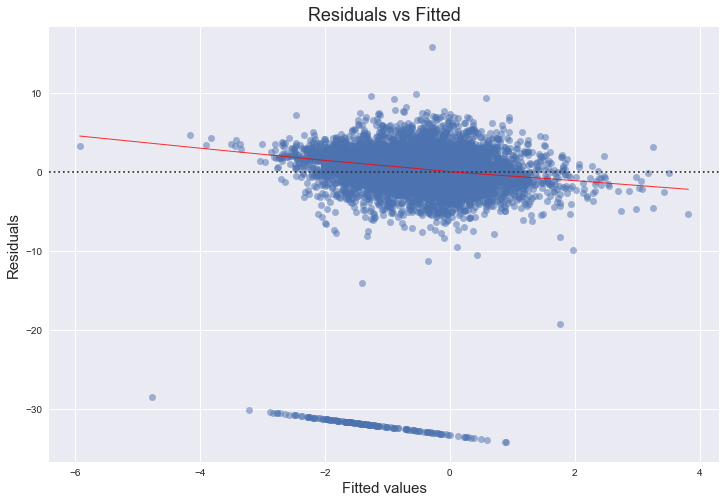

In [128]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'target', data=Z, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

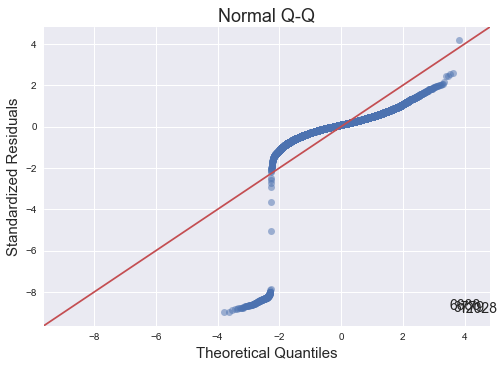

In [129]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

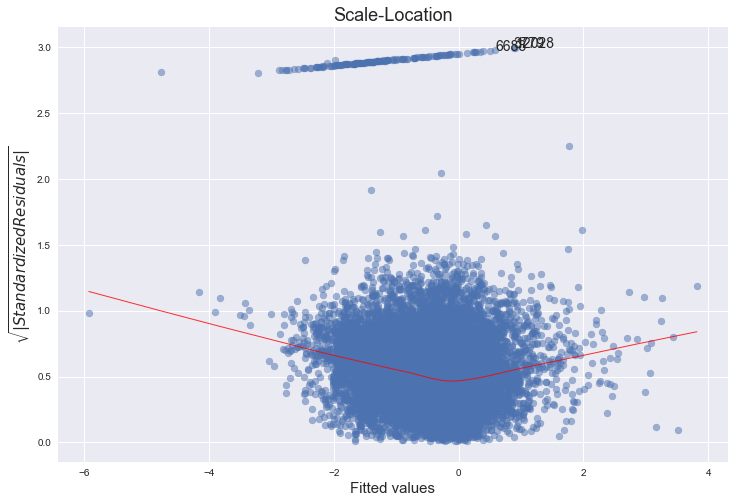

In [131]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y.iloc[[i]], 
                                   model_norm_residuals_abs_sqrt[i]));

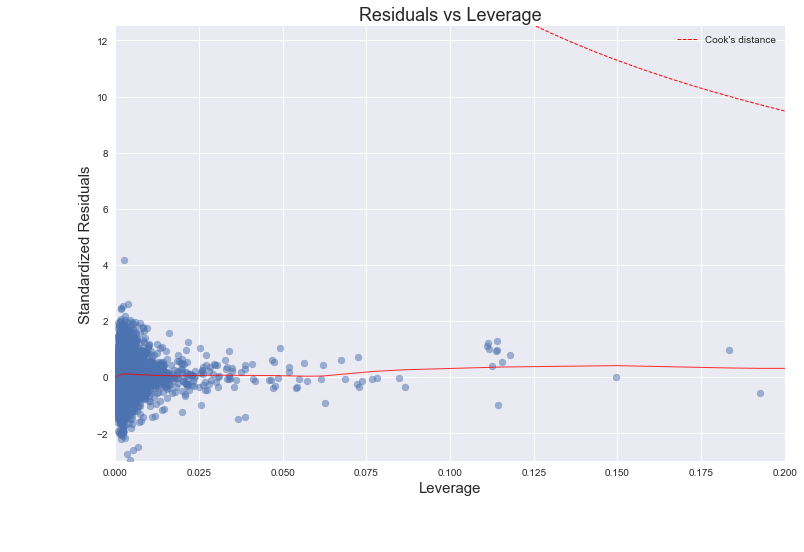

In [132]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 12.5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [133]:
X=train[features]
X_new = X.assign(const=1)
vif_factors=pd.Series([variance_inflation_factor(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns)
vif_factors.sort_values(ascending=False)

const                                     396219.518150
sqrt_category_3_A_sum                         13.933737
month_lag_min                                 12.747177
month_lag_std                                  9.407121
log_transactions_count                         8.913722
category_3_B_sum                               8.634490
month_lag_mean                                 5.719820
subsector_id_x_nunique                         4.269226
sqrt_city_id_x_nunique                         4.201136
most_recent_purchases_range_4_0_sum            4.152754
purchase_month_max                             4.069663
Days                                           3.966542
most_recent_sales_range_4_0_sum                3.940971
most_recent_sales_range_3_0_sum                3.818371
purchase_month_std                             3.275011
most_recent_sales_range_5_0_sum                3.263621
sqrt_category_3_C_sum                          3.164211
most_recent_purchases_range_2_0_sum            3

In [134]:
import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [135]:
# Assume that we have a DataFrame with columns x, y, z
data_as_df = train[features]
data_as_array = data_as_df.values
partial_corr_array = partial_corr(np.hstack((np.ones((data_as_array.shape[0],1)), data_as_array))
                                 )[1:,1:]
corr_df = pd.DataFrame(partial_corr_array, columns = data_as_df.columns)
print(corr_df)

    feature_1  feature_2  feature_3  category_1_x_sum  category_1_x_mean  \
0    1.000000  -0.173877   0.615674         -0.028842           0.020700   
1   -0.173877   1.000000   0.088438         -0.007479          -0.021840   
2    0.615674   0.088438   1.000000          0.045633          -0.049866   
3   -0.028842  -0.007479   0.045633          1.000000           0.510349   
4    0.020700  -0.021840  -0.049866          0.510349           1.000000   
5   -0.002030  -0.004365   0.015909          0.002057          -0.000911   
6    0.014186   0.028820   0.006966         -0.064952          -0.005568   
7   -0.002443   0.047638   0.005643         -0.077388           0.013199   
8   -0.014931   0.015199  -0.000282         -0.087508           0.038190   
9   -0.085781   0.016257   0.081238          0.240469          -0.251037   
10   0.047324  -0.026597  -0.048894         -0.101135           0.084958   
11   0.037669  -0.018114  -0.044542         -0.058376           0.046004   
12   0.05974

In [ ]:
train.columns = train.columns.str.replace(".", "_")
train.drop(['OutlierAdj'], axis=1,inplace=True)
train.shape

#### For test upload on Kaggle 

In [ ]:
intercept_val,RSquared,globalRegressor

In [93]:
RSquared

0.027087500292953592

In [96]:

predictions1 = globalRegressor.predict(x_test_least)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_least, predictions1))
print(RMSE)


3.728634999272583


In [98]:
test.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-04  C_ID_0ab67a22ab          3          3          1   
1            2017-01  C_ID_130fd0cbdd          2          3          0   
2            2017-08  C_ID_b709037bc5          5          1          1   
3            2017-12  C_ID_d27d835a9f          2          1          0   
4            2015-12  C_ID_2b5e3df5c2          5          1          1   

   transactions_count  category_1_x_sum  category_1_x_mean  category_1_y_sum  \
0                  71                23           0.323944         26.000000   
1                  87                 4           0.045977          4.000000   
2                  15                 2           0.133333          2.000000   
3                  36                 1           0.027778          3.000000   
4                 116                 0           0.000000          3.000000   

   category_1_y_mean  category_2_x_1.0_sum  category_2_x_2.0_sum  \
0           0.366197             71.000000              0.000000   
1           0.045977              4.000000              0.000000   
2           0.133333              3.000000              0.000000   
3           0.083333             35.000000              0.000000   
4           0.025862              4.000000              0.000000   

   category_2_x_3.0_sum  category_2_x_4.0_sum  category_2_x_5.0_sum  \
0              0.000000              0.000000              0.000000   
1              1.000000             82.000000              0.000000   
2              0.000000              0.000000             12.000000   
3              0.000000              0.000000              1.000000   
4              6.000000            106.000000              0.000000   

   category_3_A_sum  category_3_B_sum  category_3_C_sum  \
0          0.000000         48.000000         23.000000   
1          0.000000         84.000000          3.000000   
2          3.000000          2.000000         10.000000   
3          2.000000         22.000000         12.000000   
4          1.000000        108.000000          7.000000   

   most_recent_sales_range_1.0_sum  most_recent_sales_range_2.0_sum  \
0                         8.000000                        14.000000   
1                         4.000000                        16.000000   
2                         0.000000                         1.000000   
3                         2.000000                         0.000000   
4                        13.000000                        44.000000   

   most_recent_sales_range_3.0_sum  most_recent_sales_range_4.0_sum  \
0                        24.000000                         2.000000   
1                        39.000000                        13.000000   
2                        11.000000                         1.000000   
3                        13.000000                         7.000000   
4                        35.000000                        14.000000   

   most_recent_sales_range_5.0_sum  most_recent_purchases_range_1.0_sum  \
0                        23.000000                             9.000000   
1                        15.000000                             3.000000   
2                         2.000000                             0.000000   
3                        14.000000                             0.000000   
4                        10.000000                            12.000000   

   most_recent_purchases_range_2.0_sum  most_recent_purchases_range_3.0_sum  \
0                            17.000000                            16.000000   
1                            16.000000                            40.000000   
2                            11.000000                             2.000000   
3                             6.000000                            10.000000   
4                            54.000000                            23.000000   

   most_recent_purchases_range_4.0_sum  most_recent_purchases_range_5.0_sum  \
0                         

In [101]:
test.columns = test.columns.str.replace(".", "_")
test.shape

(123623, 70)

In [103]:
from scipy import stats
test['log_transactions_count'] = np.log(test['transactions_count'].replace(to_replace=0, value=0.00001))
test['log_category_2_x_1_0_sum'] = np.log(test['category_2_x_1_0_sum'].replace(to_replace=0, value=0.00001))
test['sqrt_category_3_A_sum'] = np.sqrt(test['category_3_A_sum'])
test['sqrt_category_3_C_sum'] = np.sqrt(test['category_3_C_sum'])
test['log_most_recent_sales_range_1_0_sum'] = np.log(test['most_recent_sales_range_1_0_sum'].replace(to_replace=0, value=0.00001))
test['log_most_recent_sales_range_2_0_sum'] = np.log(test['most_recent_sales_range_2_0_sum'].replace(to_replace=0, value=0.00001))
test['log_most_recent_purchases_range_1_0_sum'] = np.log(test['most_recent_purchases_range_1_0_sum'].replace(to_replace=0, value=0.00001))
test['log_most_recent_purchases_range_3_0_sum'] = np.log(test['most_recent_purchases_range_3_0_sum'].replace(to_replace=0, value=0.00001))
test['log_category_4_0_0_sum'] = np.log(test['category_4_0_0_sum'].replace(to_replace=0, value=0.00001))
test['log_category_4_1_0_sum'] = np.log(test['category_4_1_0_sum'].replace(to_replace=0, value=0.00001))
test['sqrt_city_id_x_nunique'] = np.log(test['city_id_x_nunique'].replace(to_replace=0, value=0.00001))
#train['log_numerical_2_mean'] = np.log(train['numerical_2_mean'].replace(to_replace=0, value=0.00001))

#notfeat = ['card_id', 'first_active_month','target','transactions_count','category_2_x_1_0_sum','category_3_A_sum','category_3_B_sum','category_3_C_sum','most_recent_sales_range_1_0_sum','most_recent_sales_range_2_0_sum','most_recent_sales_range_3_0_sum','most_recent_sales_range_4_0_sum','most_recent_sales_range_5_0_sum','most_recent_purchases_range_1_0_sum','most_recent_purchases_range_2_0_sum','most_recent_purchases_range_3_0_sum','most_recent_purchases_range_4_0_sum','category_4_0_0_sum','category_4_1_0_sum','city_id_x_nunique','Days','category_1_x_sum','installments_sum','installments_mean','installments_min','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag6_mean','avg_purchases_lag3_mean','avg_purchases_lag12_mean','merchant_id_nunique','merchant_group_id_nunique','category_1_y_sum','category_1_y_mean','city_id_y_nunique','installments_std','merchant_category_id_x_nunique','merchant_group_id_nunique','most_recent_purchases_range_5_0_sum','purchase_amount_max','purchase_amount_mean','purchase_amount_stand','purchase_amount_std','purchase_frequency_stand']
notfeat = ['card_id', 'first_active_month','target','city_id_x_nunique','category_4_0_0_sum','category_4_1_0_sum','most_recent_purchases_range_3_0_sum','most_recent_purchases_range_1_0_sum','transactions_count','category_2_x_1_0_sum','category_3_A_sum','category_3_C_sum','most_recent_sales_range_1_0_sum','most_recent_sales_range_2_0_sum','installments_sum','installments_mean','installments_min','purchase_date_max','purchase_date_min','purchase_date_ptp','purchase_amount_max','purchase_amount_std','purchase_amount_mean','avg_sales_lag6_mean','avg_purchases_lag3_mean','avg_purchases_lag12_mean','merchant_id_nunique','merchant_group_id_nunique','category_1_y_sum','category_1_y_mean','city_id_y_nunique','installments_std','merchant_category_id_x_nunique','merchant_group_id_nunique','most_recent_purchases_range_5_0_sum','purchase_amount_max','purchase_amount_mean','purchase_amount_stand','purchase_amount_std','purchase_frequency_stand']
features = [c for c in train.columns if c not in (notfeat)]

In [104]:
#For Kaggle Submission
x_test = test[features]
predictions = globalRegressor.predict(x_test)
type(predictions)

numpy.ndarray

In [105]:
predictions.reshape(-1,1)#For Kaggle Submission

array([[-1.34253485],
       [ 1.92941114],
       [ 0.17668436],
       ...,
       [-0.17727061],
       [-0.87621141],
       [-0.30715058]])

In [106]:
t=pd.DataFrame({'target':predictions[:,0]})#For Kaggle Submission

In [107]:
t.head()#For Kaggle Submission

target
0 -1.342535
1  1.929411
2  0.176684
3  0.164820
4 -0.900648

In [108]:
final_sub = pd.concat([test['card_id'], t], axis=1)#For Kaggle Submission

In [109]:
final_sub.head()
final_sub.to_csv('/Users/rajmati.marlecha/Documents/elo-merchant-category-recommendation/submitutmost_ridge_features.csv', index = False, header = True)